# **Unsupervised Learning Practice Project: Fantasy Sports Clustering Analysis**

--------------------------------
## **Context** 
-------------------------------

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


----------------------------
## **Objective**
-----------------------------

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

--------------------------
## **Data Description**
--------------------------

- **Player_Name:** Name of the player.
- **Club:** Club in which the player plays.
- **Position:** Position in which the player plays.
- **Goals_Scored:** Number of goals scored by the player in the previous season.
- **Assists:** Number of passes made by the player leading to goals in the previous season.
- **Total_Points:** Total number of fantasy points scored by the player in the previous season.
- **Minutes:** Number of minutes played by the player in the previous season.
- **Goals_Conceded:** Number of goals conceded by the player in the previous season.
- **Creativity:** A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
- **Influence:** A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
- **Threat:** A score, computed using a range of stats, that gauges players who are most likely to score goals.
- **Bonus:** Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
- **Clean_Sheets:** Number of matches without conceding a goal in the previous season.

## **Importing the necessary libraries and overview of the dataset**

In [25]:
pip install scikit-learn-extra

In [26]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Complete the code to import the data
data = pd.read_csv('fpl_data.csv')

In [4]:
# Check the shape of the data
data.shape

(476, 13)

In [5]:
# Let's view a sample of the data
data.sample(n = 10, random_state = 1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
441,Mark Noble,West Ham United,Midfielder,0,0,27,701,15,88.6,80.4,7,0,0
363,Sean Longstaff,Newcastle United,Midfielder,0,1,41,1405,26,182.8,179.2,148,1,2
31,Anwar El Ghazi,Aston Villa,Midfielder,10,0,111,1604,22,426.1,500.4,726,13,5
132,Olivier Giroud,Chelsea,Forward,4,0,47,740,5,112.0,161.4,403,6,4
90,Chris Wood,Burnley,Forward,12,3,138,2741,43,323.2,595.8,1129,16,9
249,Vontae Daley-Campbell,Leicester City,Defender,0,0,0,0,0,0.0,0.0,0,0,0
65,Danny Welbeck,Brighton and Hove Albion,Forward,6,4,89,1541,18,269.7,319.8,595,15,6
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
117,Christian Pulisic,Chelsea,Midfielder,4,3,82,1731,21,378.8,361.4,724,3,7
415,Ryan Sessegnon,Tottenham Hotspurs,Defender,0,0,0,0,0,0.0,0.0,0,0,0


In [7]:
# Checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [8]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [9]:
# Check for duplicate values
print("Any duplicate rows:", data.duplicated().any())

Any duplicate rows: False


In [10]:
# Check for missing values in the data
has_missing = data.isnull().values.any()
print("Any missing values:", has_missing)

Any missing values: False


## **Exploratory Data Analysis**

**Let's check the statistical summary of the data**

In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player_Name,476,476,Alex Runnarsson,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,476,17,Arsenal,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,476,4,Midfielder,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goals_Scored,476.0,NaN,NaN,NaN,1.907563,3.455562,0.0,0.0,0.5,2.0,23.0
Assists,476.0,NaN,NaN,NaN,1.752101,2.708563,0.0,0.0,0.0,2.0,14.0
Total_Points,476.0,NaN,NaN,NaN,58.516807,51.293559,0.0,10.0,48.0,94.25,244.0
Minutes,476.0,NaN,NaN,NaN,1336.909664,1073.773995,0.0,268.75,1269.5,2256.25,3420.0
Goals_Conceded,476.0,NaN,NaN,NaN,19.157563,15.946171,0.0,4.0,18.0,31.0,68.0
Creativity,476.0,NaN,NaN,NaN,195.97605,251.478541,0.0,8.3,96.95,296.95,1414.9
Influence,476.0,NaN,NaN,NaN,294.617647,267.779681,0.0,46.5,233.1,499.5,1318.2


### **Univariate Analysis**

In [33]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**`Goals Scored`**

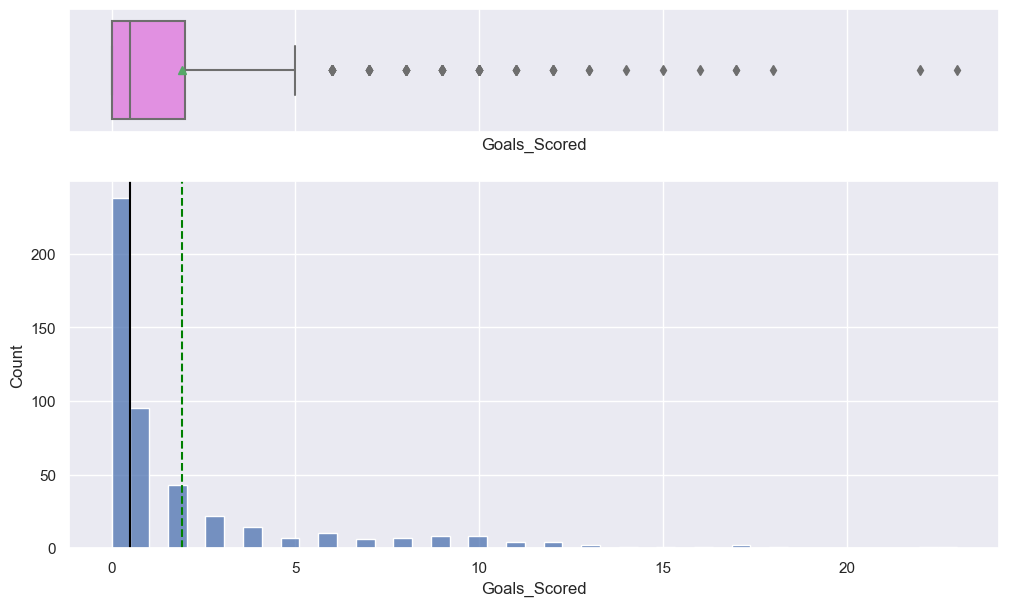

In [34]:
histogram_boxplot(df, 'Goals_Scored')

**`Assists`**

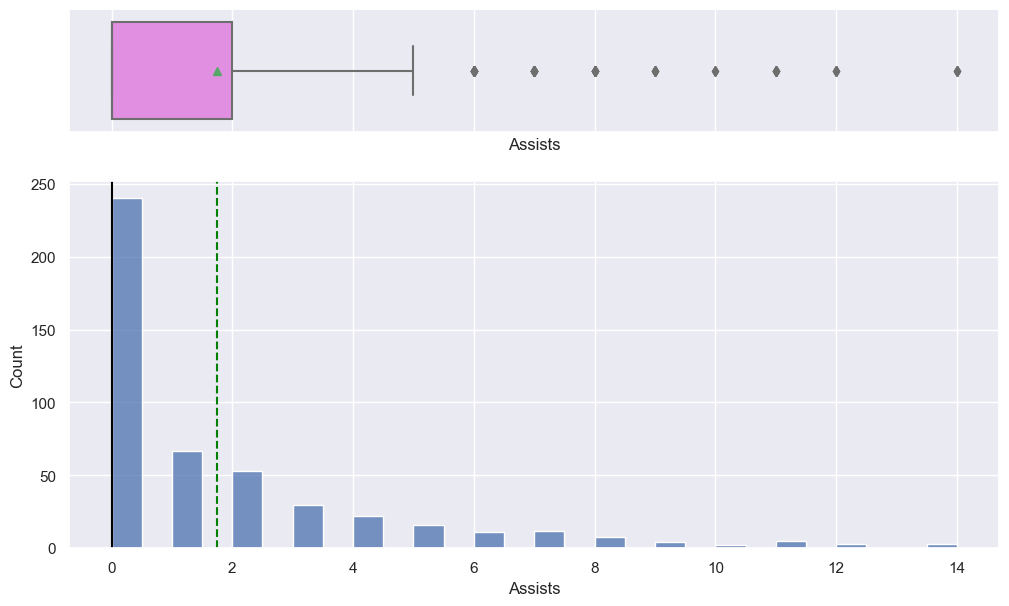

In [30]:
histogram_boxplot(df, 'Assists')  # Complete the code to create histogram_boxplot for 'Assists'

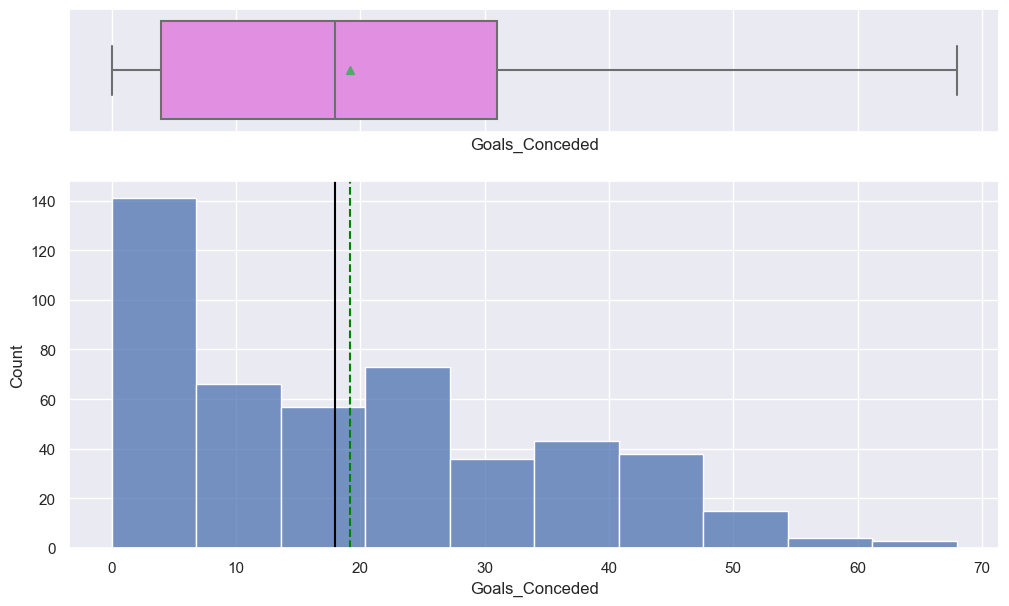

In [35]:
histogram_boxplot(df, 'Goals_Conceded') # Plot the histogram and the boxplot for 'Goals_Conceded'

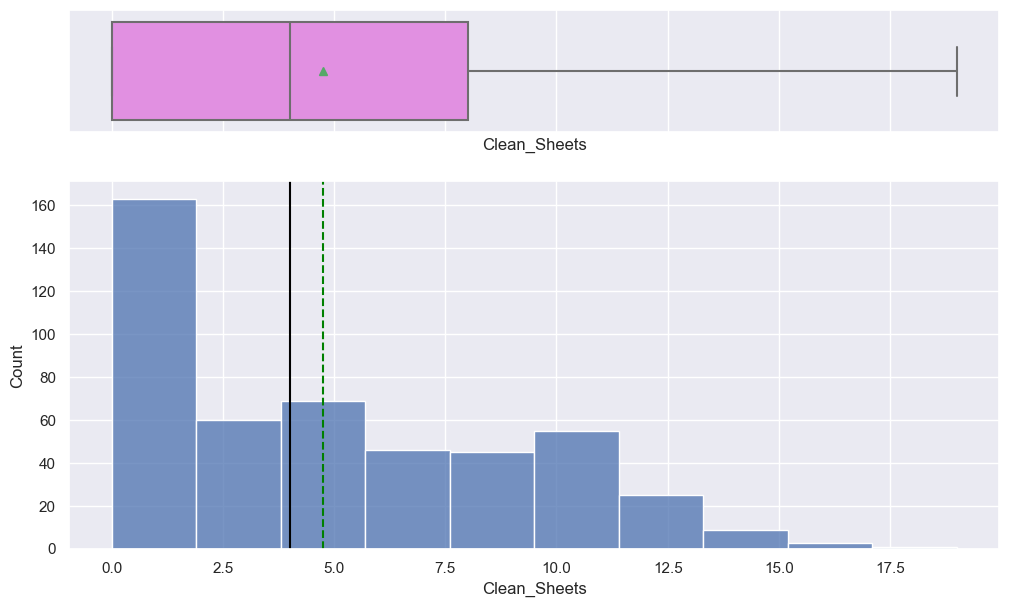

In [36]:
histogram_boxplot(df, 'Clean_Sheets') # Plot the histogram and the boxplot for 'Clean_Sheets'

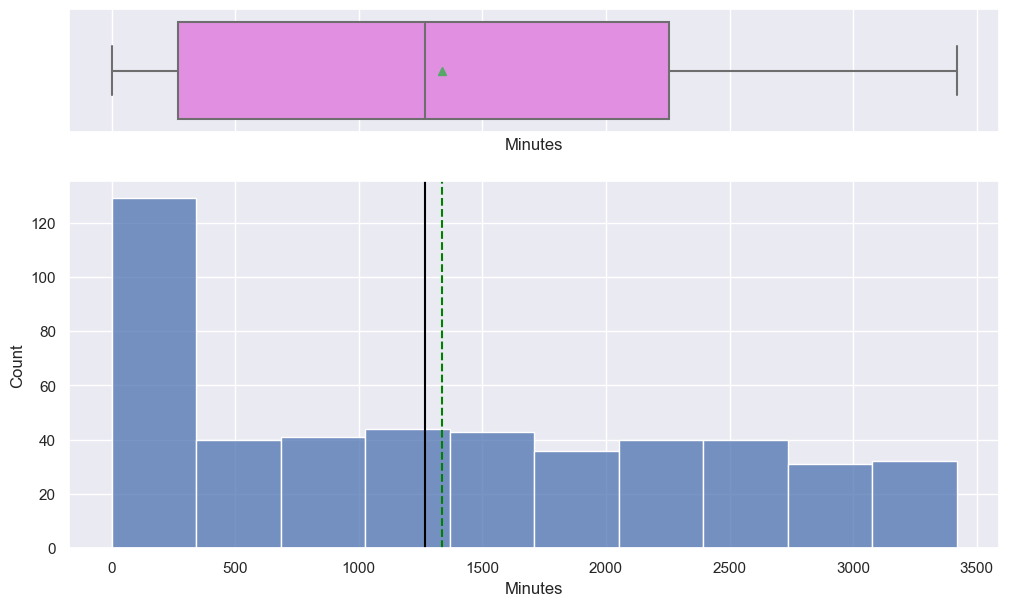

In [37]:
histogram_boxplot(df, 'Minutes') # Plot the histogram and the boxplot for 'Minutes'

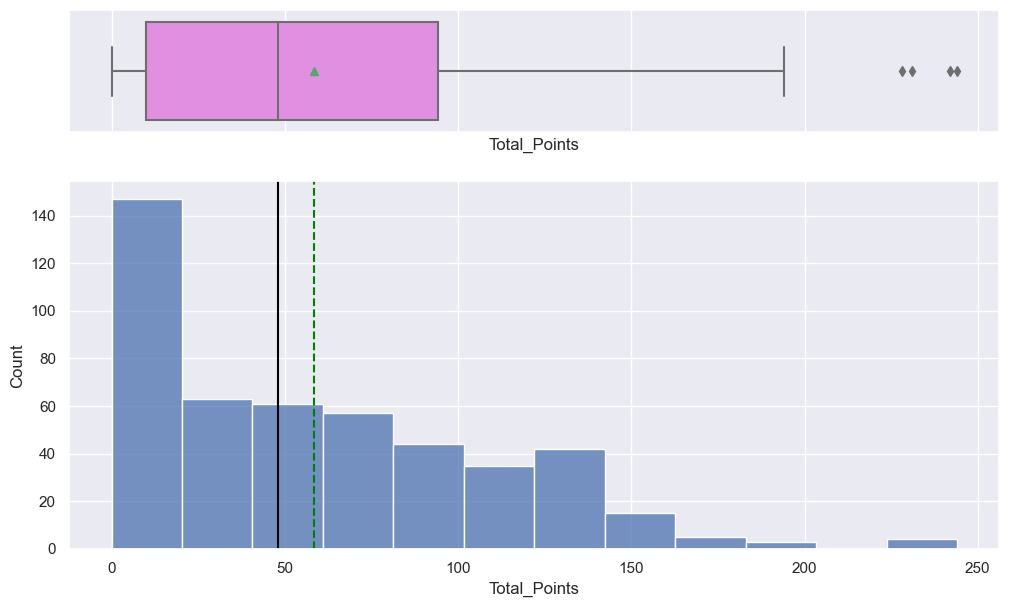

In [38]:
histogram_boxplot(df, 'Total_Points') # Plot the histogram and the boxplot for 'Total_Points'

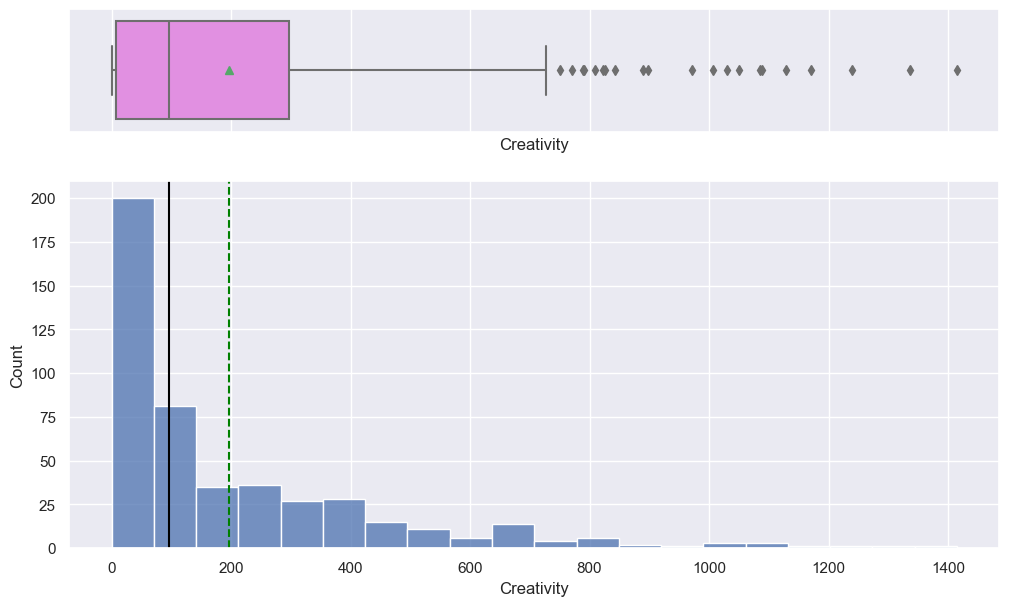

In [39]:
histogram_boxplot(df, 'Creativity') # Plot the histogram and the boxplot for 'Creativity'

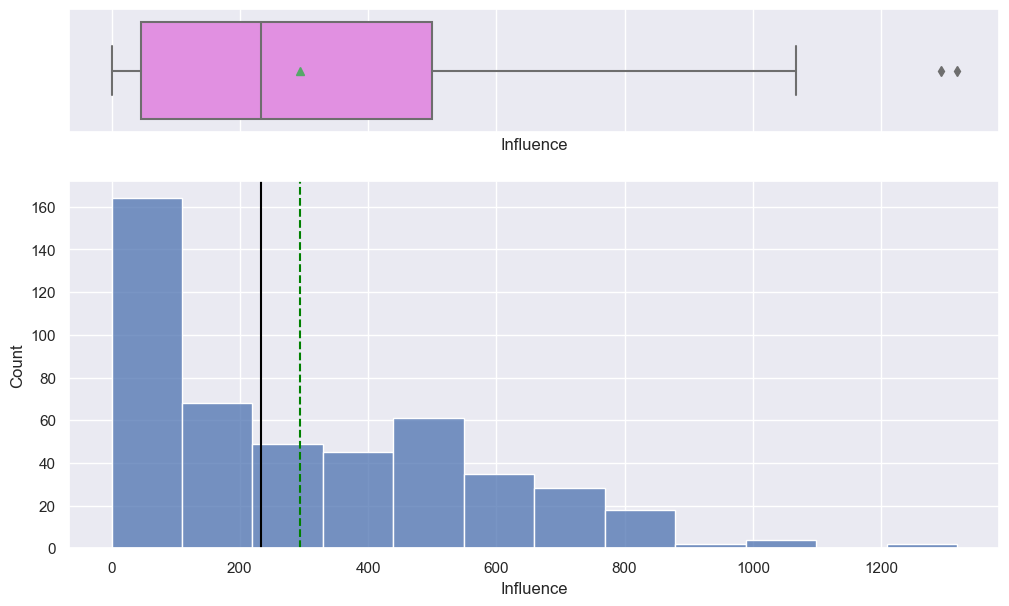

In [40]:
histogram_boxplot(df, 'Influence') # Plot the histogram and the boxplot for 'Influence'

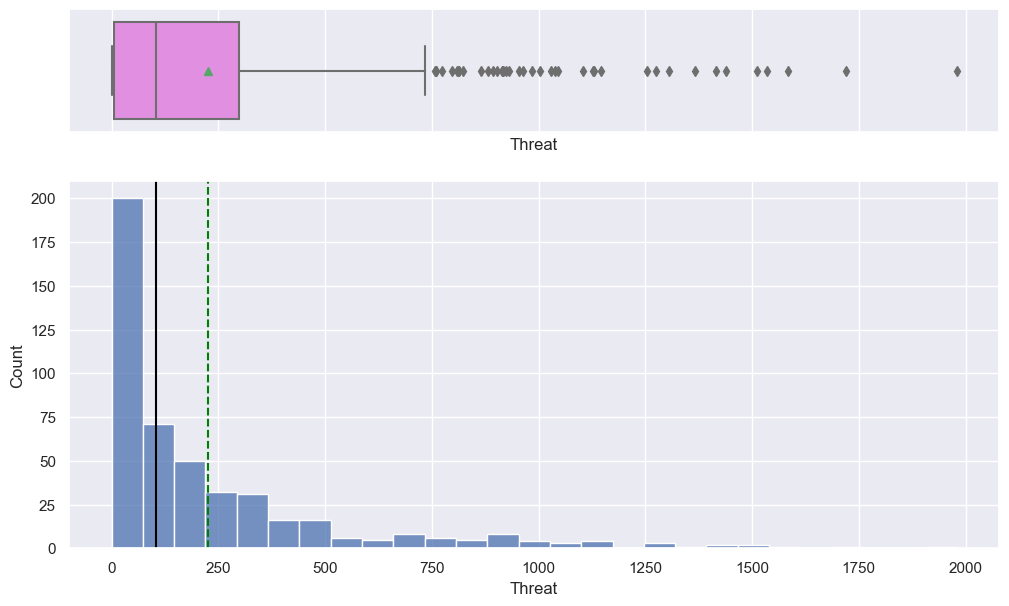

In [41]:
histogram_boxplot(df, 'Threat') # Plot the histogram and the boxplot for 'Threat'

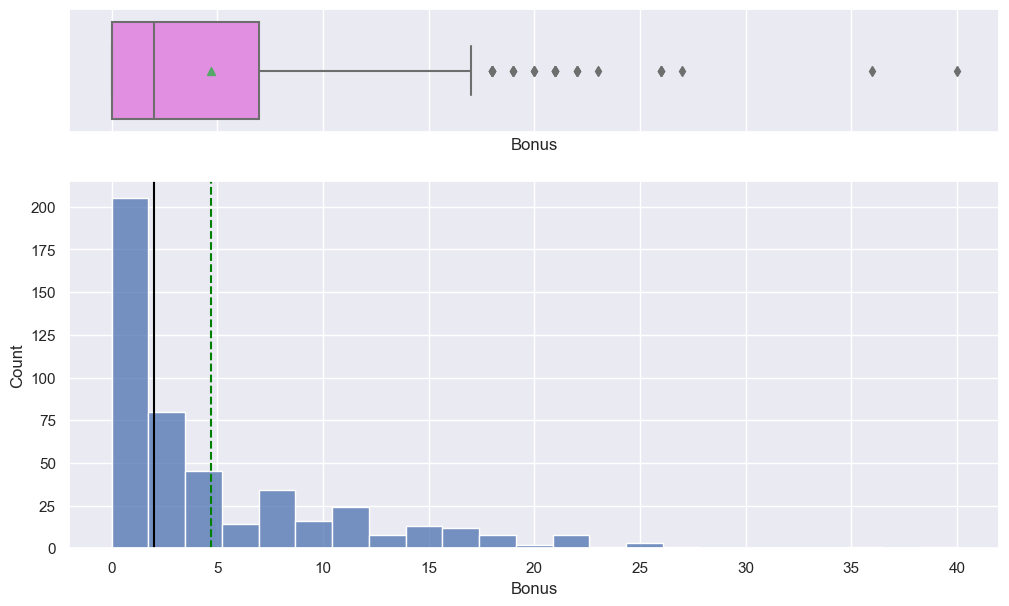

In [42]:
histogram_boxplot(df, 'Bonus') # Plot the histogram and the boxplot for 'Bonus'

**For all the graphs above, box plots shows median, mean, their length of whiskers, and in some graphs it also contains the outliers which corresponds to the values in histograms. The histograms also consists of solid black line to show median and dotted green line as mean.**

In [44]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**`Club`**

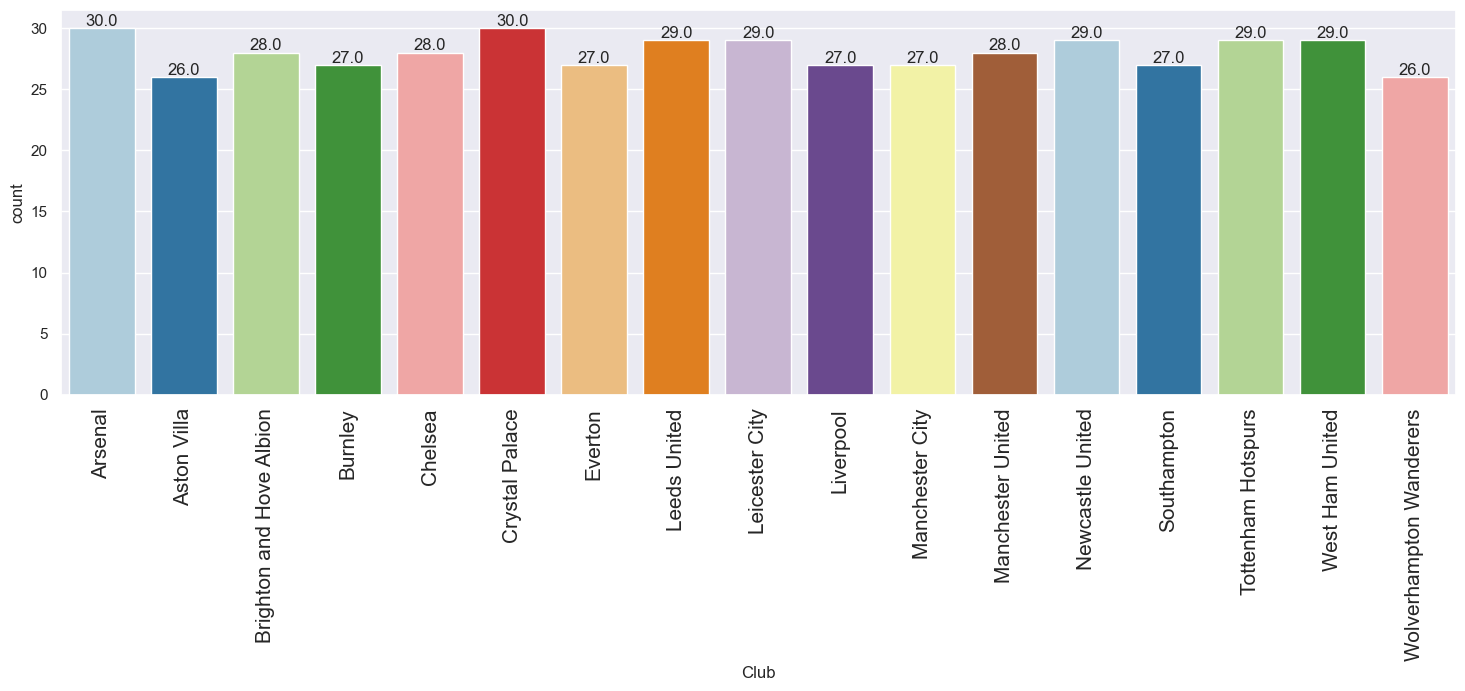

In [45]:
labeled_barplot(df, 'Club')

**`Position`**

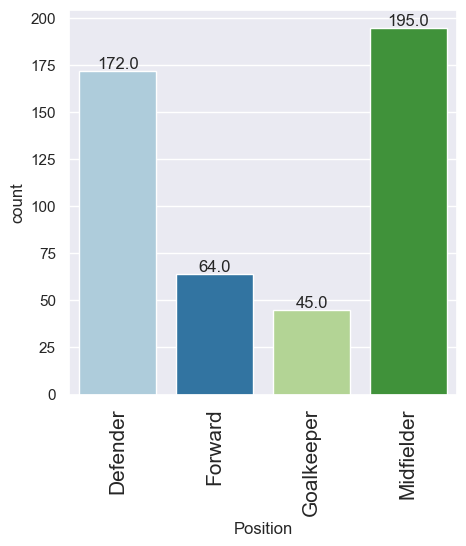

In [47]:
labeled_barplot(df, 'Position')  # Complete the code to create a labelled barplot for 'Position'

**For the above bar plots it shows bars for all the attributes under "Club" and "Position" and the number of occurrences for each in the data. For "Club" attributes, "Arsenal" and "Crystal Palace" have the maximum value of 30.0 and "Aston Villa" and "Wolverhampton Wanderes" have the minimum value of 26.0 which means that there are 30 players playing for each "Arsenal" and "Crystal Palace" clubs and 26 players playing for each "Aston Villa" and "Wolverhampton Wanderes". For "Position" attributes, "Midfielder" has the maximum value of 195.0 and Goalkeeper has minimum value of 45.0 which means that out of all the players in the data, there are 195 players who play at Midfielder position and 45 players who are goalkeeper.**

### **Bivariate Analysis**

**We are done with univariate analysis. Let's explore the data a bit more with bivariate analysis.**

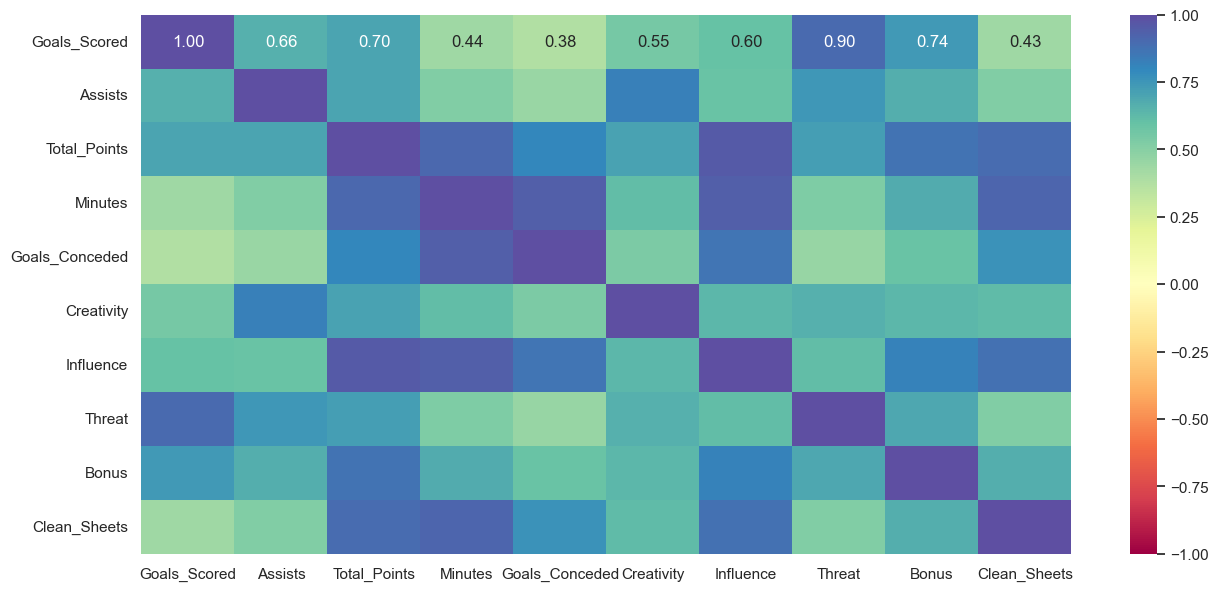

In [48]:
# Correlation check
cols_list = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    df[cols_list].corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**The above heat map showcases the relationship of the columns containing numbers to each other in terms of color.**

**Let's check players from which team have scored the most fantasy points on average.**

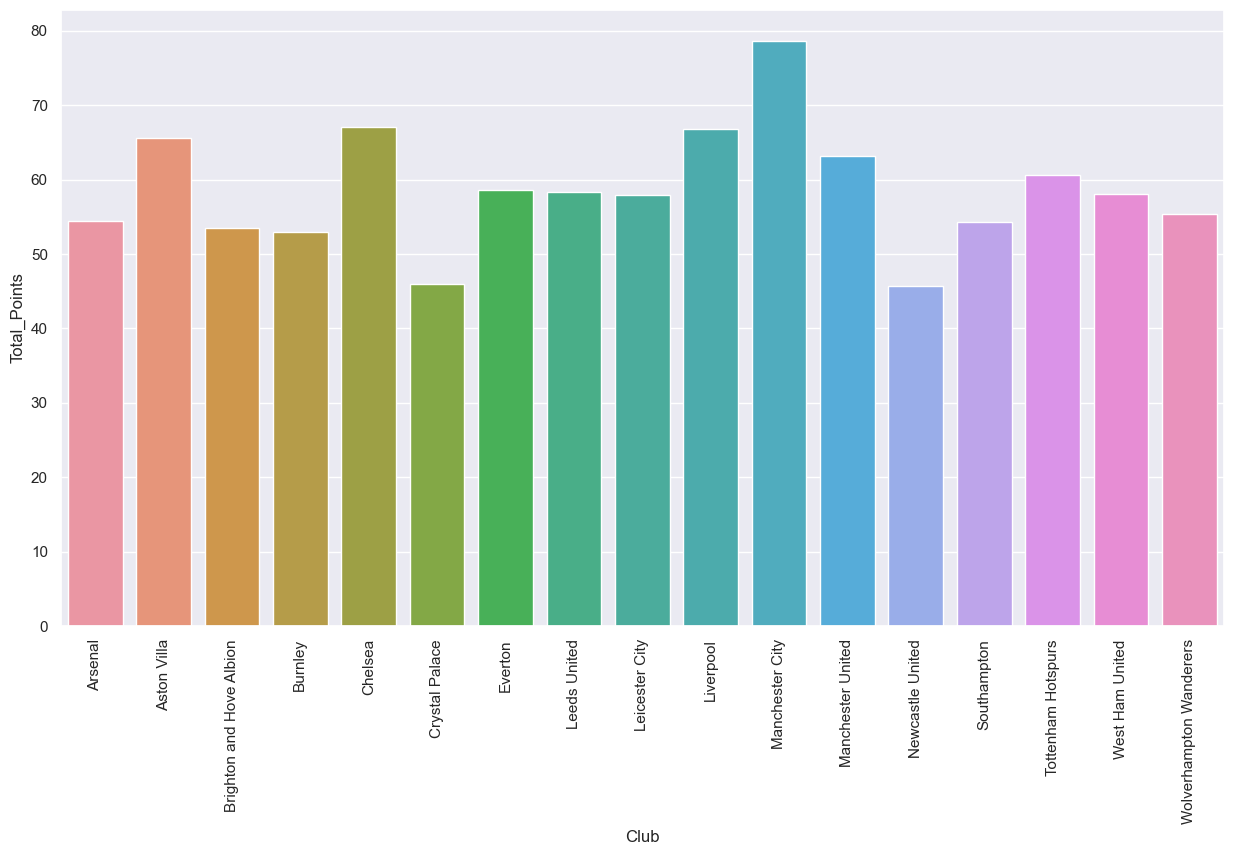

In [51]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Club' , y = 'Total_Points' , errorbar=('ci', False))  # Complete the code to choose the right variables

plt.xticks(rotation = 90) 

plt.show()

**We know that players in different positions have specific roles to play in a team. Let's check players in which positions tend to score more fantasy points on average.**

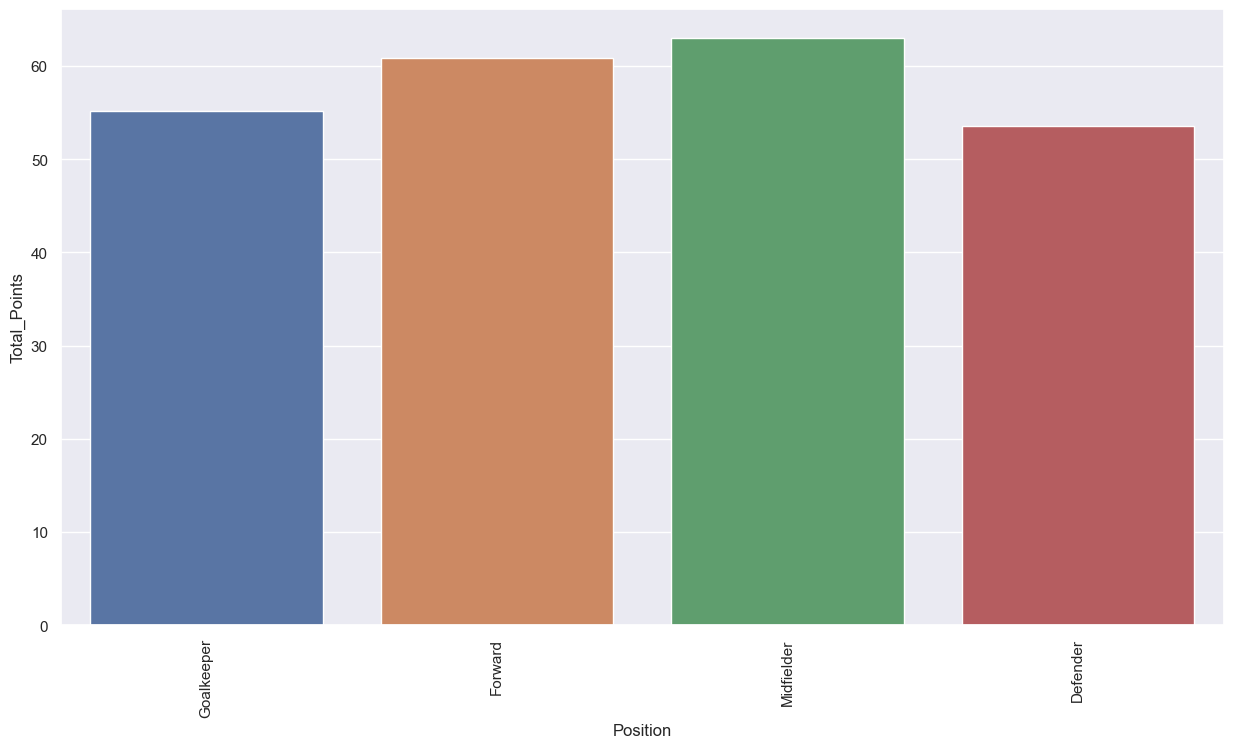

In [53]:
# Complete the code with the right variables
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Position' , y = 'Total_Points' , errorbar=('ci', False))  # Complete the code to choose the right variables

plt.xticks(rotation = 90) 

plt.show()

**To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. Let's check the total number of minutes played, on average, across different positions.**

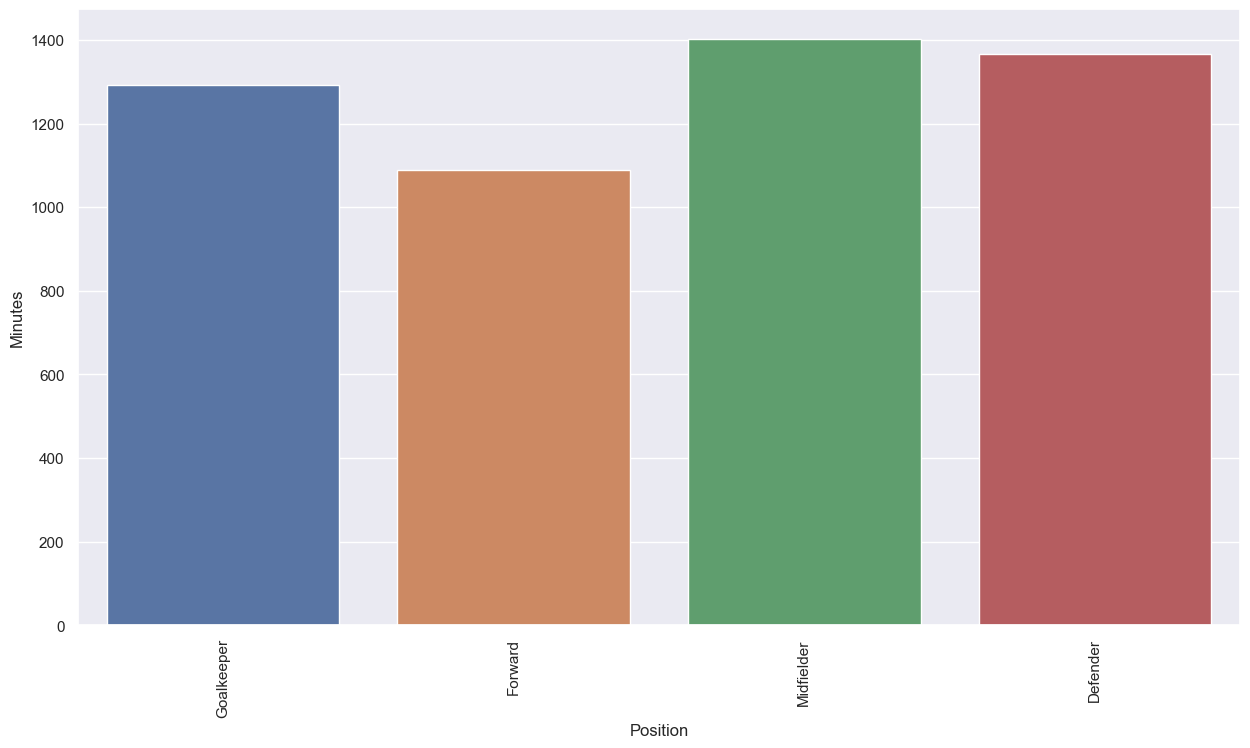

In [57]:
# Complete the code with the right variables
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Position' , y = 'Minutes' , errorbar=('ci', False))  # Complete the code to choose the right variables

plt.xticks(rotation = 90) 

plt.show()

**Every point counts in fantasy sports and getting bonus points for a player is always a treat. Let's check which team's players have secured the most bonus points, on average, last season.**

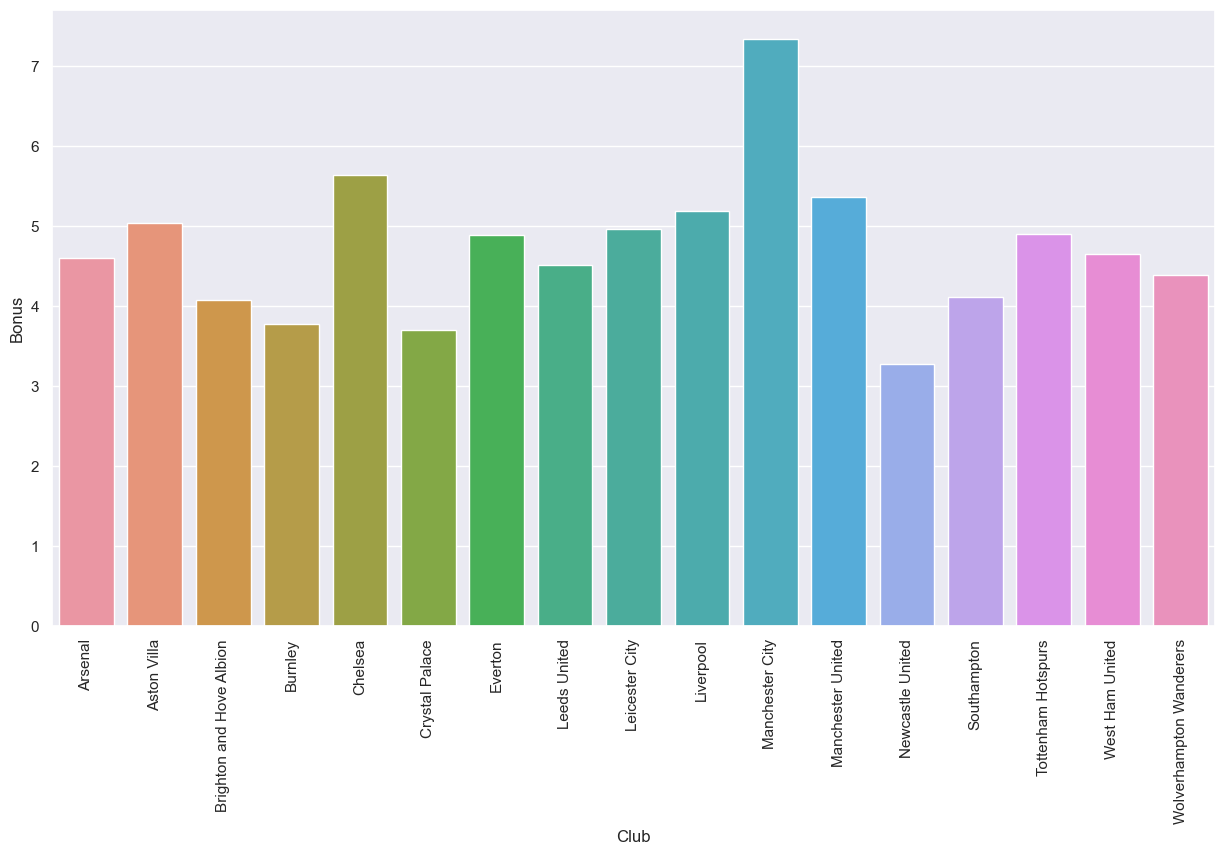

In [62]:
# Complete the code with the right variables
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Club' , y = 'Bonus' , errorbar=('ci', False))  # Complete the code to choose the right variables

plt.xticks(rotation = 90) 

plt.show()

**Let's see which players scored the most fantasy points last season for different positions of play.**

In [63]:
pos_list = df.Position.unique().tolist()
best_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best_df = pd.concat([best_df, df_aux[df_aux.Total_Points == df_aux.Total_Points.max()][['Player_Name', 'Club', 'Position', 'Total_Points']]])

best_df

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
403,Harry Kane,Tottenham Hotspurs,Forward,242
315,Bruno Fernandes,Manchester United,Midfielder,244
223,Stuart Dallas,Leeds United,Defender,171


**Let's see the top 10 players with the most fantasy points last season for different positions of play.**

In [64]:
best10_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best10_df = pd.concat([best10_df, df_aux.sort_values('Total_Points', ascending=False).reset_index(drop=True).loc[:10, ['Player_Name', 'Club', 'Position', 'Total_Points']]])

best10_df

,Player_Name,Club,Position,Total_Points
0,Emiliano Martinez,Aston Villa,Goalkeeper,186
1,Ederson Moares,Manchester City,Goalkeeper,160
2,Illan Meslier,Leeds United,Goalkeeper,154
3,Hugo Lloris,Tottenham Hotspurs,Goalkeeper,149
4,Nick Pope,Burnley,Goalkeeper,144
5,Alisson Becker,Liverpool,Goalkeeper,140
6,Edouard Mendy,Chelsea,Goalkeeper,140
7,Lukasz Fabianski,West Ham United,Goalkeeper,133
8,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,132
9,Bernd Leno,Arsenal,Goalkeeper,131


### **Outlier Check**

- Let's plot the boxplots of all numerical columns to check for outliers.

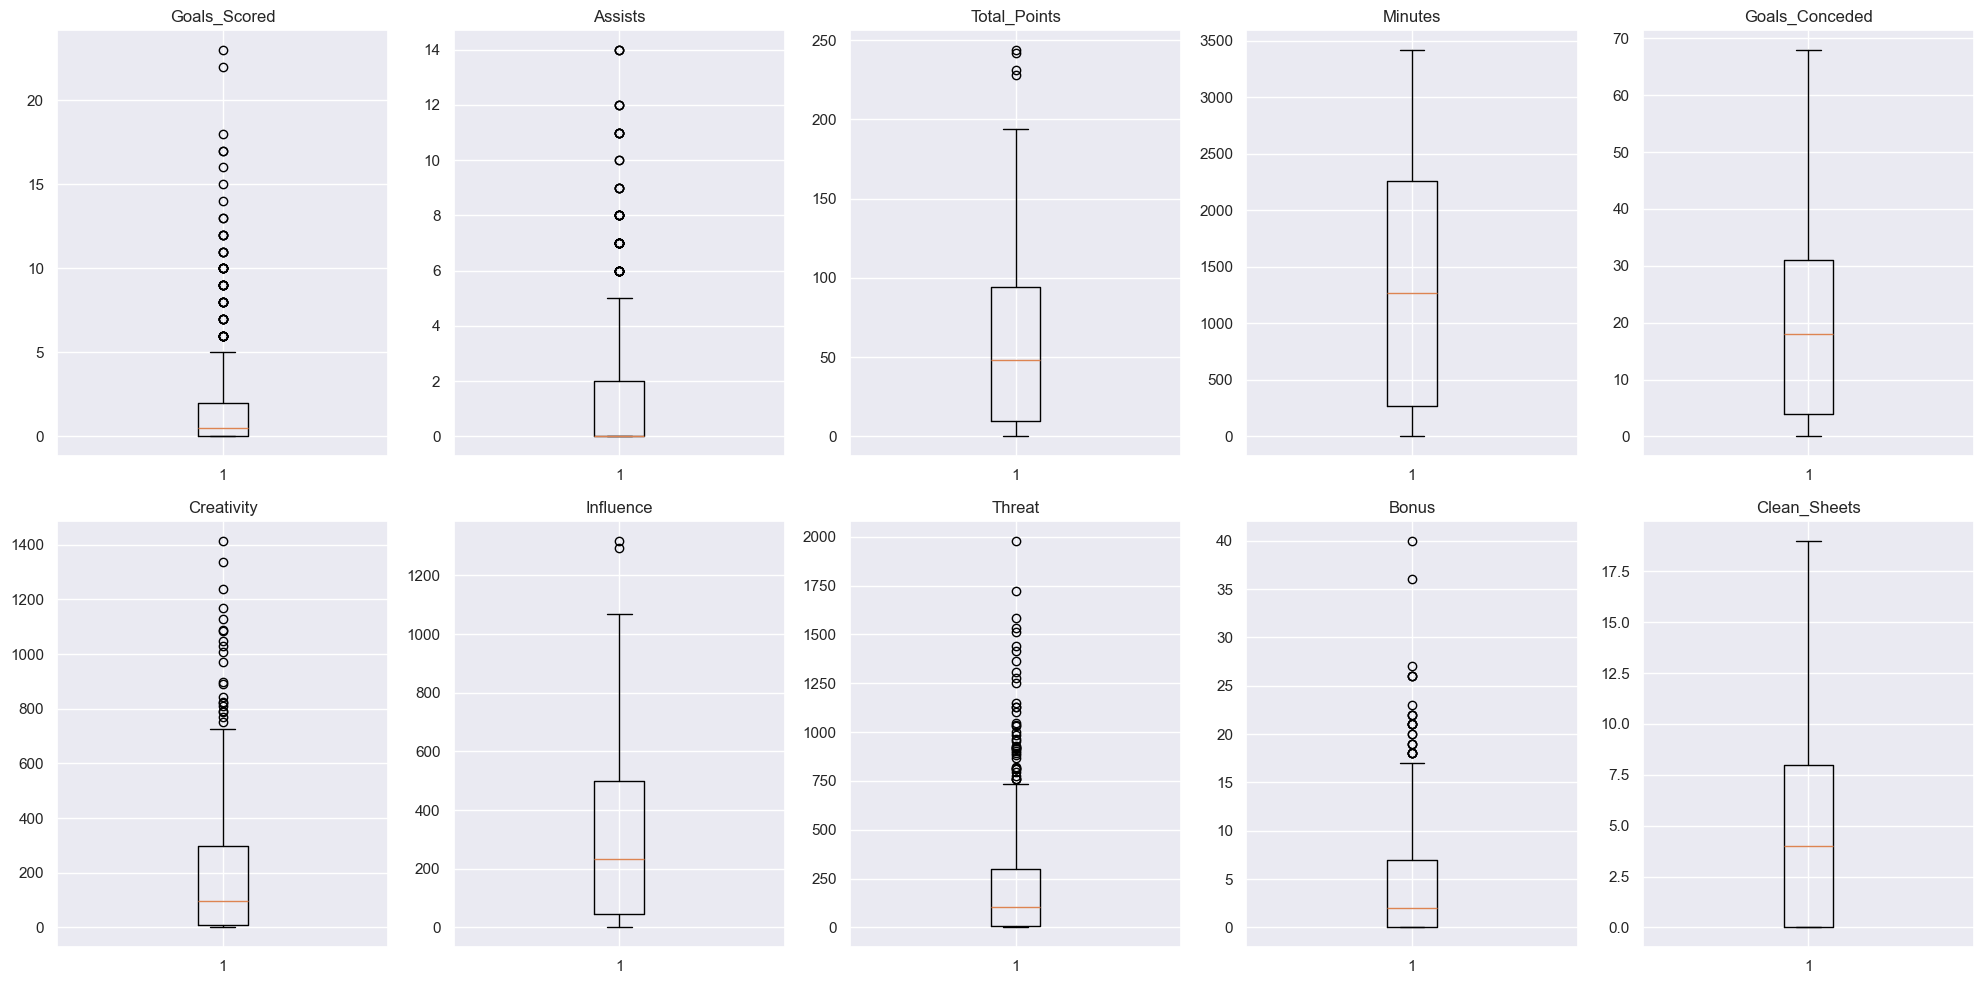

In [65]:
plt.figure(figsize = (20, 10))

numeric_columns = df.select_dtypes(include = np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    
    plt.subplot(2, 5, i + 1)
    
    plt.boxplot(df[variable], whis = 1.5)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Scaling**

- Let's scale the data before we proceed with clustering.

In [67]:
# Scaling the data before clustering
scaler = StandardScaler() # Initialize the Standard Scaler

numerical_features = ['Goals_Scored', 'Assists', 'Total_Points', 'Minutes', 'Goals_Conceded', 'Creativity', 'Influence', 'Threat', 'Bonus', 'Clean_Sheets']
subset = df[numerical_features]  # Complete the code to get the data with numerical features

subset_scaled = scaler.fit_transform(subset) # Fit_transform the scaler function on data subset

In [68]:
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

### **Applying PCA**


In [71]:
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = subset.shape[1]                                    # Storing the number of variables in the subset data

pca = PCA(n_components=n, random_state=1)              # Initialize PCA with n_components = n and random_state = 1

data_pca = pd.DataFrame(pca.fit_transform(subset_scaled))      # Fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_                     

## **K-Means Clustering**

In [73]:
k_means_df = data_pca.copy()

Number of Clusters: 1 	Average Distortion: 2.773037110097803
Number of Clusters: 2 	Average Distortion: 1.8635736785898265
Number of Clusters: 3 	Average Distortion: 1.5612774038101607
Number of Clusters: 4 	Average Distortion: 1.3545171820838156
Number of Clusters: 5 	Average Distortion: 1.293154169974169
Number of Clusters: 6 	Average Distortion: 1.2341231453420078
Number of Clusters: 7 	Average Distortion: 1.1457934035634147
Number of Clusters: 8 	Average Distortion: 1.1153076568890792
Number of Clusters: 9 	Average Distortion: 1.0797310475776056
Number of Clusters: 10 	Average Distortion: 1.0174369926410631
Number of Clusters: 11 	Average Distortion: 0.9986112688354987
Number of Clusters: 12 	Average Distortion: 0.9862831494790057
Number of Clusters: 13 	Average Distortion: 0.9602766985773118
Number of Clusters: 14 	Average Distortion: 0.9501453167908898


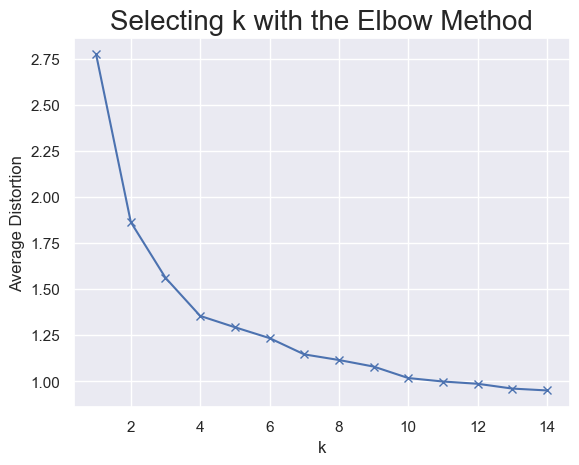

In [74]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    
    model = KMeans(n_clusters = k, random_state = 1, n_init = "auto")
    
    model.fit(data_pca)
    
    prediction = model.predict(k_means_df)
    
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")

plt.xlabel("k")

plt.ylabel("Average Distortion")

plt.title("Selecting k with the Elbow Method", fontsize = 20)

plt.show()

**We will move ahead with k = 4 because it is the clear point from which the graph line is changing the direction.**

In [75]:
kmeans = KMeans(n_clusters=4, random_state = 1, n_init = "auto") # Create K-Means with nclusters = 4

kmeans.fit(k_means_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [76]:
# Creating a copy of the original data
df1 = df.copy()

# Adding K-Means cluster labels to the K-Means dataframe
k_means_df["KM_segments"] = kmeans.labels_

# Adding K-Means cluster labels to the original dataframe
df1["KM_segments"] = kmeans.labels_

### **Cluster Profiling**

In [77]:
km_cluster_profile = df1.groupby(kmeans.labels_).mean(numeric_only = True)  # Complete the code to groupby the cluster labels

In [78]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile

km_cluster_profile["count_in_each_segment"] = (
    df1.groupby(kmeans.labels_)["Total_Points"].count().values)  # Complete the code to groupby the cluster labels

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables
km_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0) 

In [80]:
# Complete the code to print the players in each cluster. Hint: Use the KM_segments feature

for cl in df1["KM_segments"].unique(): 
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Cedric Soares' 'Edward Nketiah'
 'Gabriel Teodoro Martinelli Silva' 'Matt Macey' 'Miguel Azeez'
 'Pablo Mari' 'Reiss Nelson' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'William Saliba' 'Ahmed El Mohamady'
 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo' 'Josh Benson' 'Kevin Long'
 'Lewis Richardson' 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Kepa Arrizabalaga' 'Valenti

In [81]:
df1.groupby(["KM_segments", "Position"])['Player_Name'].count()

KM_segments  Position  
0            Defender      48
             Goalkeeper    17
             Midfielder    32
1            Defender      70
             Forward       28
             Goalkeeper    25
             Midfielder    65
2            Defender       7
             Forward       20
             Midfielder    35
3            Defender      47
             Forward       16
             Goalkeeper     3
             Midfielder    63
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

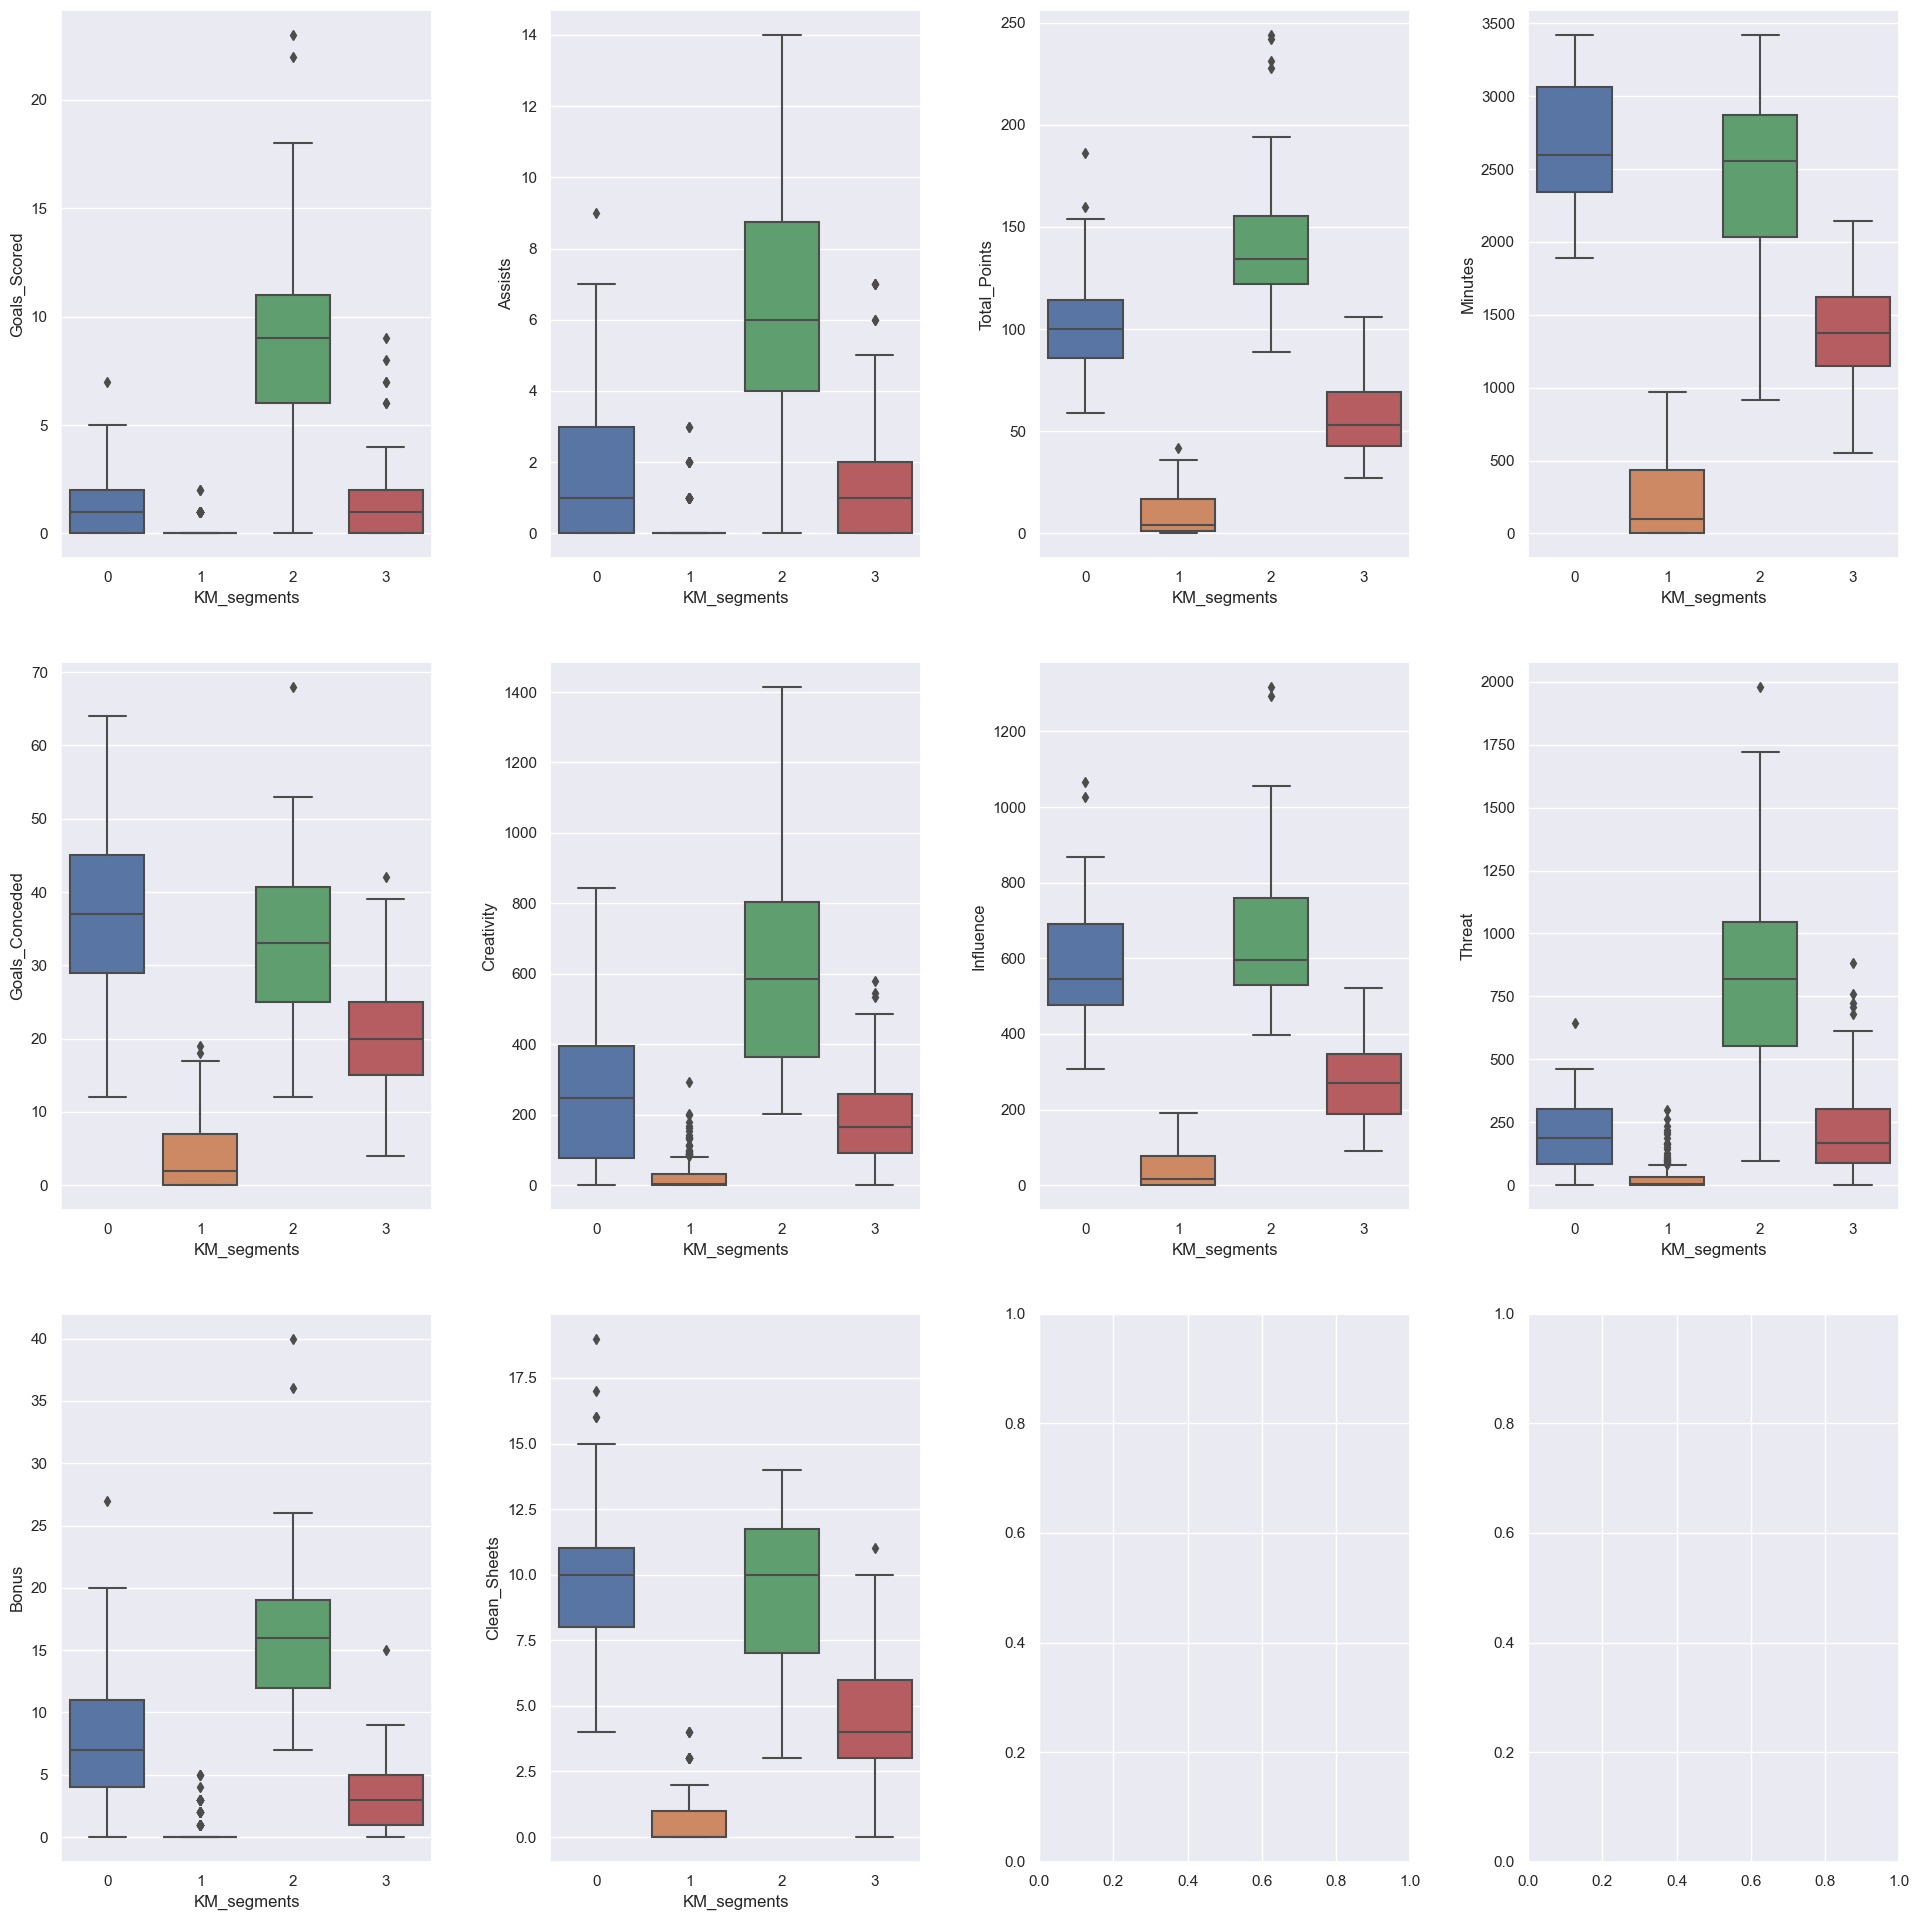

In [82]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df1,
                y = df1.columns[3 + counter],
                x = "KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

In [84]:
kmed_df = data_pca.copy()

In [85]:
kmed = KMedoids(n_clusters=4, random_state = 1) # Create K-Medoids with nclusters = 4
kmed.fit(kmed_df)

KMedoids(n_clusters=4, random_state=1)

In [104]:
# Creating a copy of the original data
df2 = df.copy()

# Add K-Medoids cluster labels to K-Medoids data
kmed_df["KMed_segments"] = kmed.labels_

# Add K-Medoids cluster labels to original data
df2["KMed_segments"] = kmed.labels_

### **Cluster Profiling**

In [105]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df2' by cluster labels column and then find mean
kmed_cluster_profile = df2.groupby("KMed_segments").mean(numeric_only = True)

In [106]:
# Create the "count_in_each_segment" column in K-Medoids cluster profile
df2.groupby(["KMed_segments", "Position"])['Player_Name'].count()

KMed_segments  Position  
0              Defender      12
               Forward       21
               Midfielder    49
1              Defender      49
               Goalkeeper    17
               Midfielder    21
2              Defender      50
               Forward       16
               Goalkeeper     3
               Midfielder    67
3              Defender      61
               Forward       27
               Goalkeeper    25
               Midfielder    58
Name: Player_Name, dtype: int64

In [107]:
# Highlight the maximum average value among all the clusters for each of the variables
kmed_cluster_profile["count_in_each_segment"] = (
    df2.groupby("KMed_segments")["Total_Points"].count().values
)

kmed_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KMed_segments,,,,,,,,,,,
0,7.512195,6.195122,133.243902,2452.243902,33.853659,602.902439,625.653659,745.402439,14.573171,9.231707,82
1,1.068966,1.091954,99.528736,2638.195402,36.632184,184.582759,575.818391,166.333333,6.988506,9.931034,87
2,1.338235,1.558824,51.073529,1270.051471,18.977941,180.458824,242.588235,203.102941,2.904412,4.205882,136
3,0.099415,0.111111,7.736842,193.187135,3.362573,18.979532,34.188304,22.608187,0.280702,0.385965,171


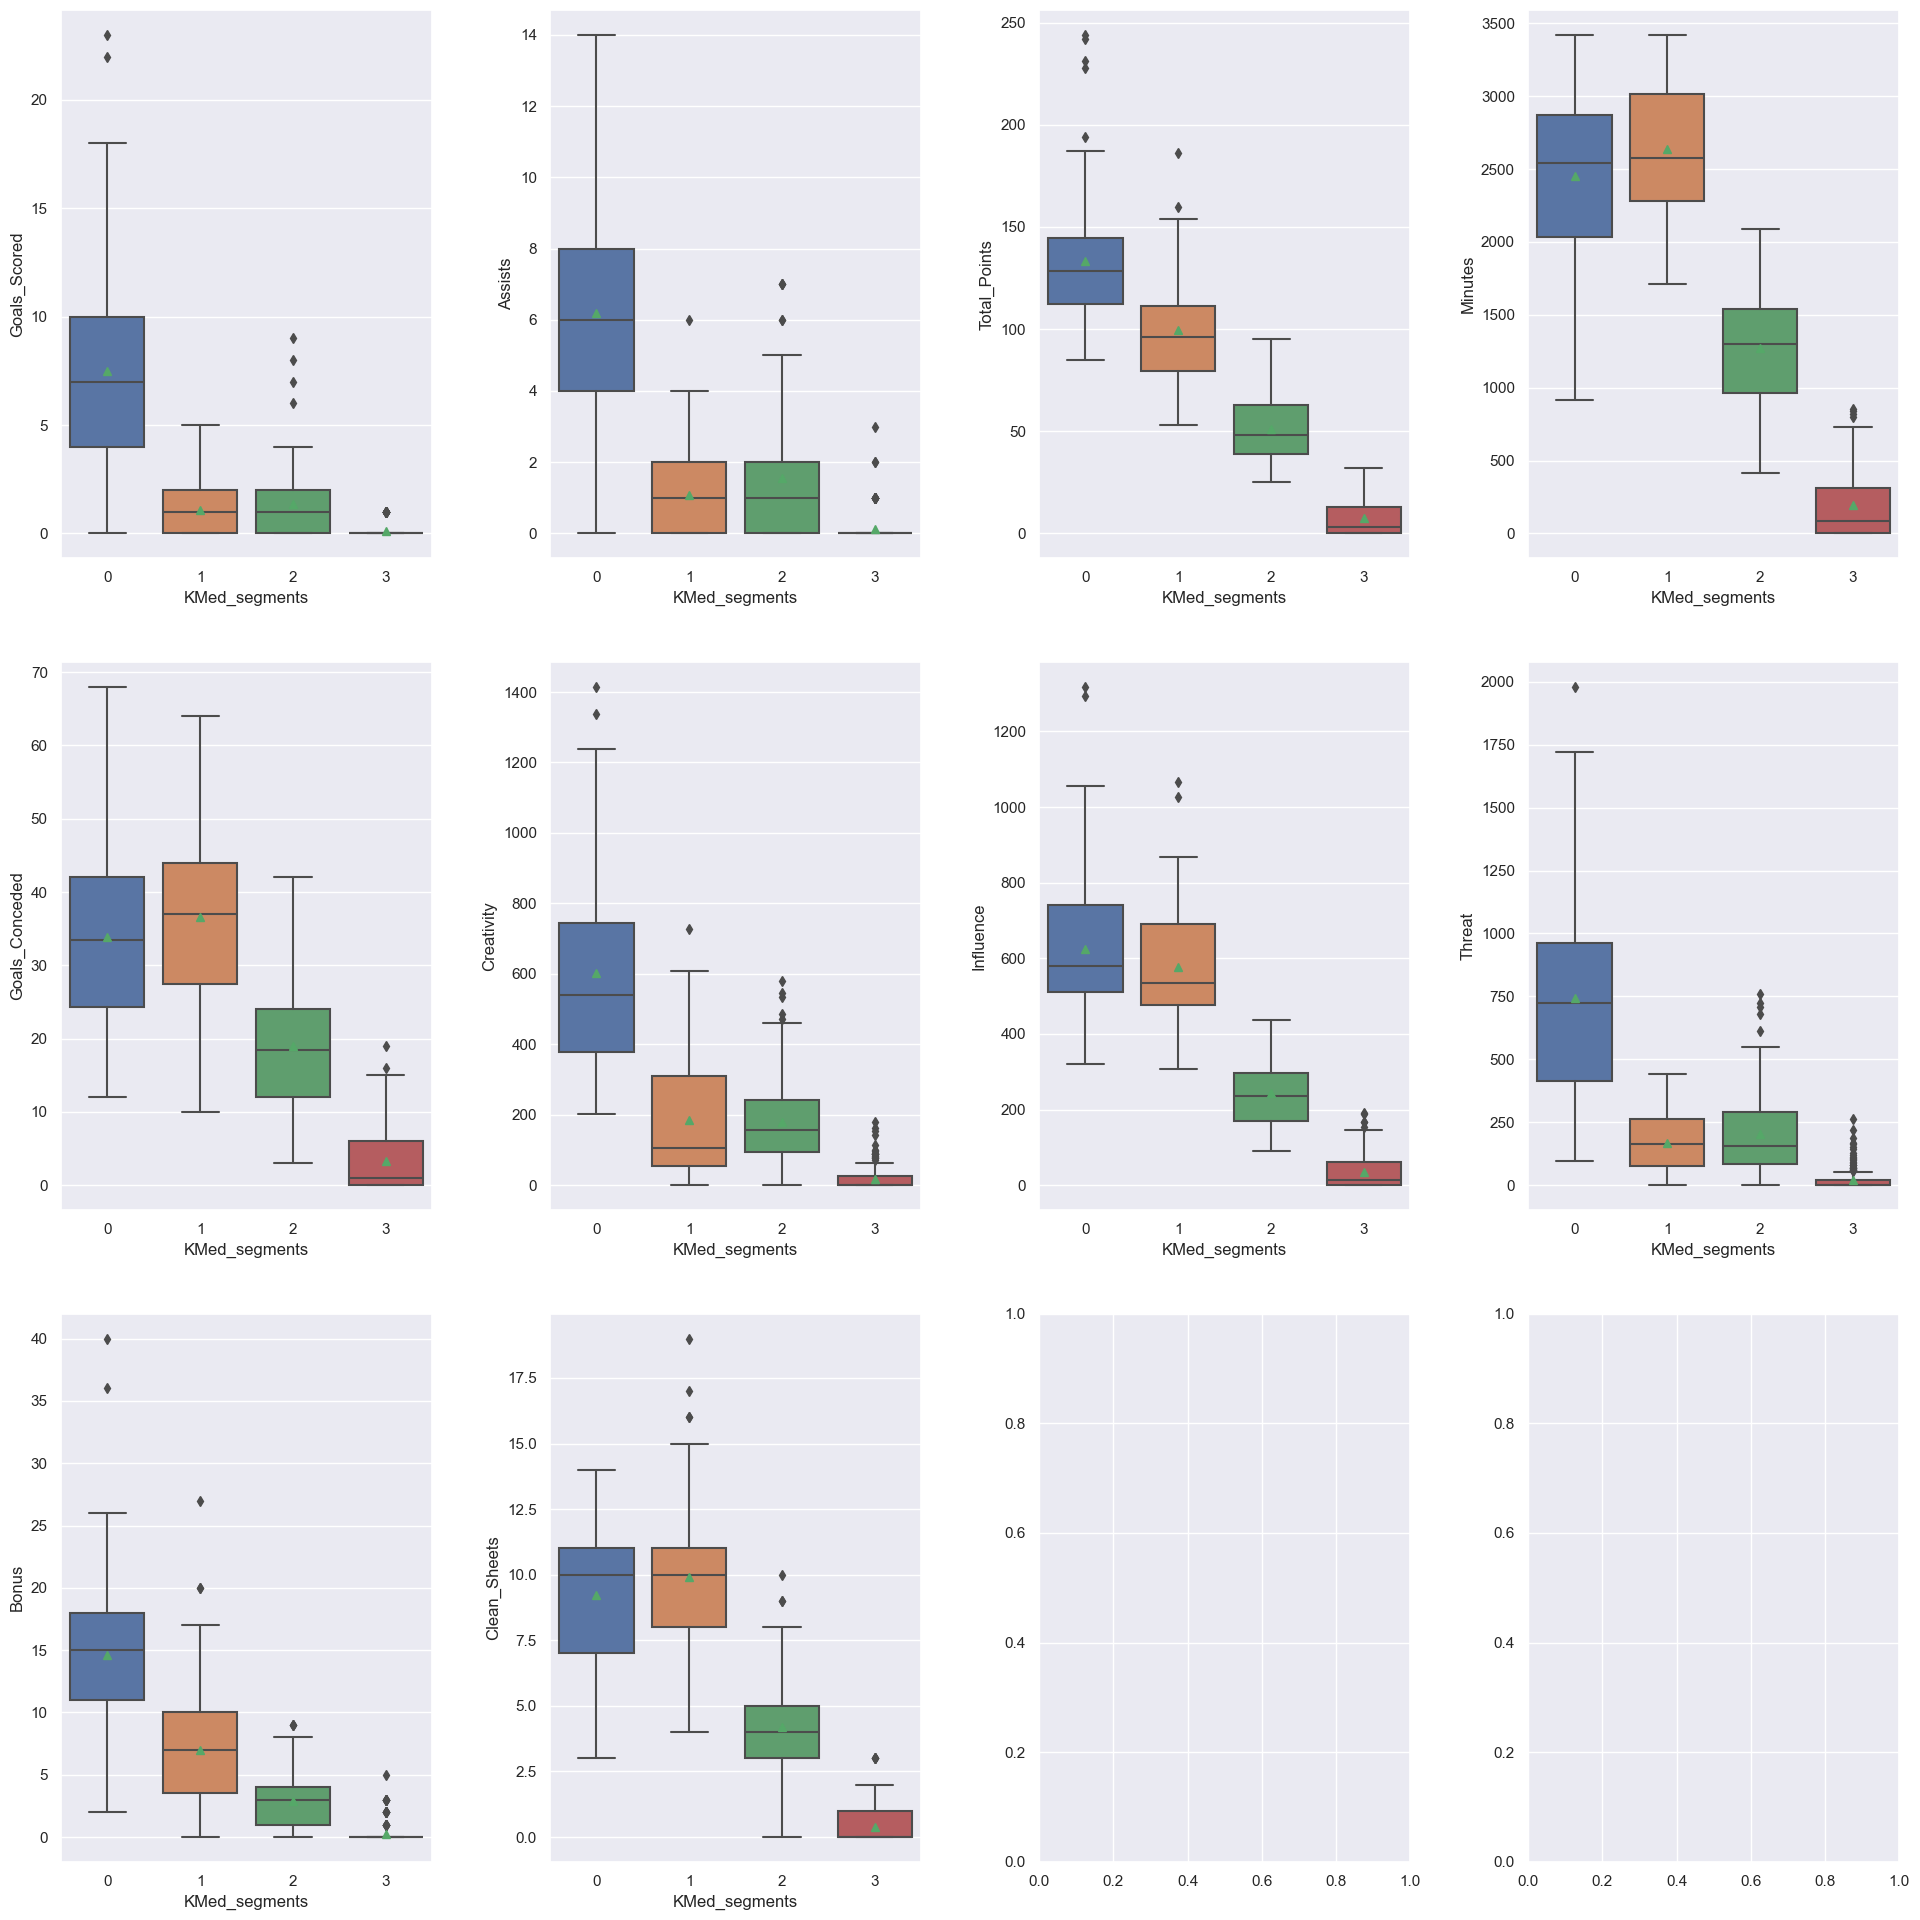

In [108]:
# Complete the code to print the players in each cluster. Hint: Use the KMed_segments feature
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df2,
                y = df2.columns[3 + counter],
                x = "KMed_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables

### **Characteristics of each cluster:___**

### **Comparison of cluster profiles from K-Means and K-Medoids:_______________**

##  **Hierarchical Clustering**

In [109]:
hc_df = data_pca.copy()

In [110]:
hc_df1 = hc_df.copy()

In [111]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df1, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228708.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7412041292261761.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585416.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.862458135106748.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8381223141111798.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.802839439063213.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8167064931302254.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8448497876639636.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132244.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946489014.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434056.
Cophenetic corr

**Let's explore different linkage methods with Euclidean distance only.**

In [112]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df1, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.8430175514228708.
Cophenetic correlation for complete linkage is 0.7412041292261761.
Cophenetic correlation for average linkage is 0.8476499945585416.
Cophenetic correlation for centroid linkage is 0.8068296032280465.
Cophenetic correlation for ward linkage is 0.5777738445861549.
Cophenetic correlation for weighted linkage is 0.862458135106748.
****************************************************************************************************
Highest cophenetic correlation is 0.862458135106748, which is obtained with weighted linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance only.**

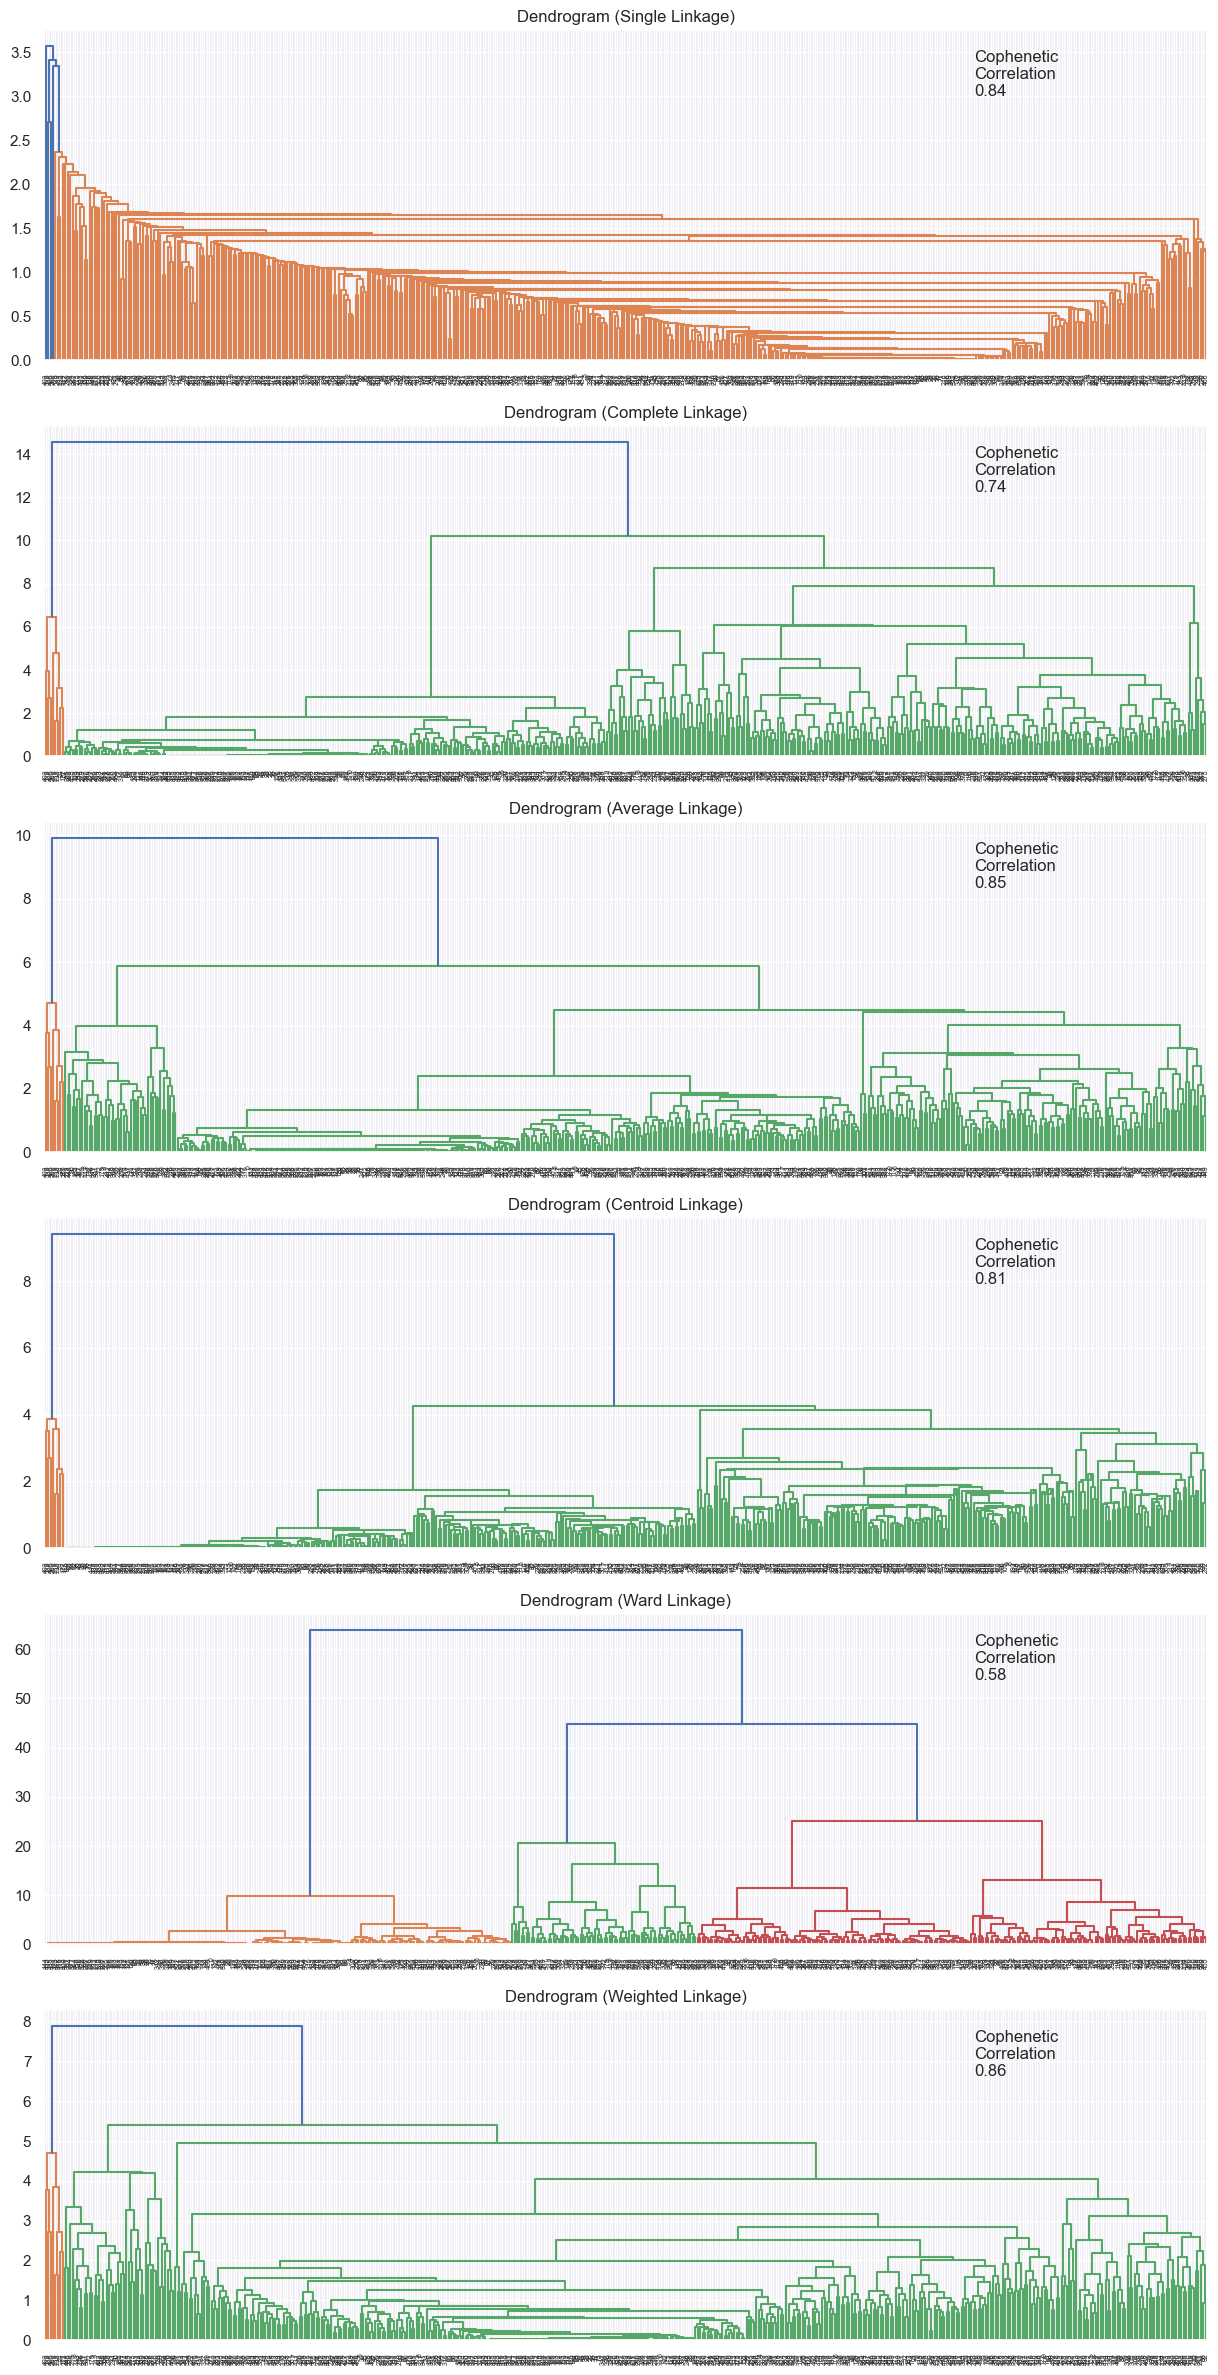

In [113]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df1, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [114]:
# Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)
df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


In [116]:
HCmodel = AgglomerativeClustering(n_clusters = 4 , metric = "euclidean" , linkage = "average" )  # Complete the code to define the hierarchical clustering with average linkage
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

In [120]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments_L1"] = HCmodel.labels_
df3["HC_segments_L1"] = HCmodel.labels_

### **Cluster Profiling**

In [122]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df3' by cluster labels column and then find mean
hc_cluster_profile = df3.groupby("HC_segments_L1").mean(numeric_only = True)

In [124]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments_L1")["Total_Points"].count().values
)

In [125]:
# Highlight the maximum average value among all the clusters for each of the variables
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments_L1,,,,,,,,,,,
0,0.881517,1.139810,47.969194,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464,422
1,16.800000,9.200000,189.000000,3033.200000,44.000000,494.340000,860.720000,1591.600000,21.800000,10.800000,5
2,8.565217,5.826087,129.391304,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130,46
3,19.333333,13.000000,238.000000,3101.000000,37.000000,1041.300000,1221.000000,1294.666667,34.000000,12.666667,3


In [126]:
# Complete the code to print the players in each cluster. Hint: Use the HC_segments feature
for cl in df3["HC_segments_L1"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments_L1"] == cl]["Player_Name"].unique())
    print()

In cluster 0, the following players are present:
['Alex Runnarsson' 'Bernd Leno' 'Calum Chambers' 'Cedric Soares'
 'Daniel Ceballos' 'David Luiz' 'Edward Nketiah' 'Emile Smith Rowe'
 'Gabriel Maghalaes' 'Gabriel Teodoro Martinelli Silva' 'Granit Xhaka'
 'Hector Bellerin' 'Kieran Tierney' 'Martin Odegaard' 'Matt Macey'
 'Miguel Azeez' 'Mohamed Naser El Sayed Elneny' 'Pablo Mari'
 'Reiss Nelson' 'Rob Holding' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'Thomas Partey' 'William Saliba'
 'Willian Borges Da Silva' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Douglas Luiz Soares de Paulo' 'Emiliano Martinez'
 'Ezri Konsa Ngoyo' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'John McGinn' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Mahmoud Ahmed Ibrahim Hassan'
 'Marvelous Nakamba' 'Matt Targett' 'Matthew Cash' 'Morgan Sanson'
 'Orjan Nyland' 'Ross Barkley' 'Tyrone Mings' 'Wesley Moraes'
 'Aaron Connolly' 'Adam Lallana' 'Adam Webst

**We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [130]:
hc_df2 = data_pca.copy()

In [131]:
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "ward")
HCmodel.fit(hc_df2)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [132]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the HC algorithm and original dataframes
hc_df["HC_segments_L2"] = HCmodel.labels_
df3["HC_segments_L2"] = HCmodel.labels_

### **Cluster Profiling**

In [133]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df3' by cluster labels column and then find mean
hc_cluster_profile = df3.groupby("HC_segments_L2").mean(numeric_only = True)

In [134]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments_L2")["Total_Points"].count().values
)

In [135]:
# Highlight the maximum average value among all the clusters for each of the variables
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments_L2,,,,,,,,,,,
0,7.960526,6.342105,135.592105,2467.605263,33.802632,594.343421,638.431579,772.302632,14.736842,9.302632,76
1,1.357143,1.669643,53.812500,1367.767857,20.866071,186.037500,259.967857,218.866071,3.000000,4.437500,112
2,1.247423,1.206186,98.453608,2557.814433,35.371134,220.125773,556.723711,185.505155,7.237113,9.721649,97
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,191


In [136]:
# Complete the code to print the players in each cluster. Hint: Use the HC_segments feature
for cl in df3["HC_segments_L2"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments_L2"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Calum Chambers' 'Cedric Soares' 'Edward Nketiah'
 'Martin Odegaard' 'Matt Macey' 'Miguel Azeez' 'Pablo Mari' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Tariq Lamptey' 'Anthony Driscoll-Glennon'
 'Bailey Peacock-Farrell' 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo'
 'Josh Benson' 'Kevin Long' 'Lewis Richardson' 'Phil Bardsley'
 'Will Norris' 'Billy Gilmour' 'Emerson Palmieri dos Santos'
 'Faustino Anjorin' 'Fikayo Tomori' 'Karlo Ziger' 'Kepa Arriza

**Let's plot the boxplot**

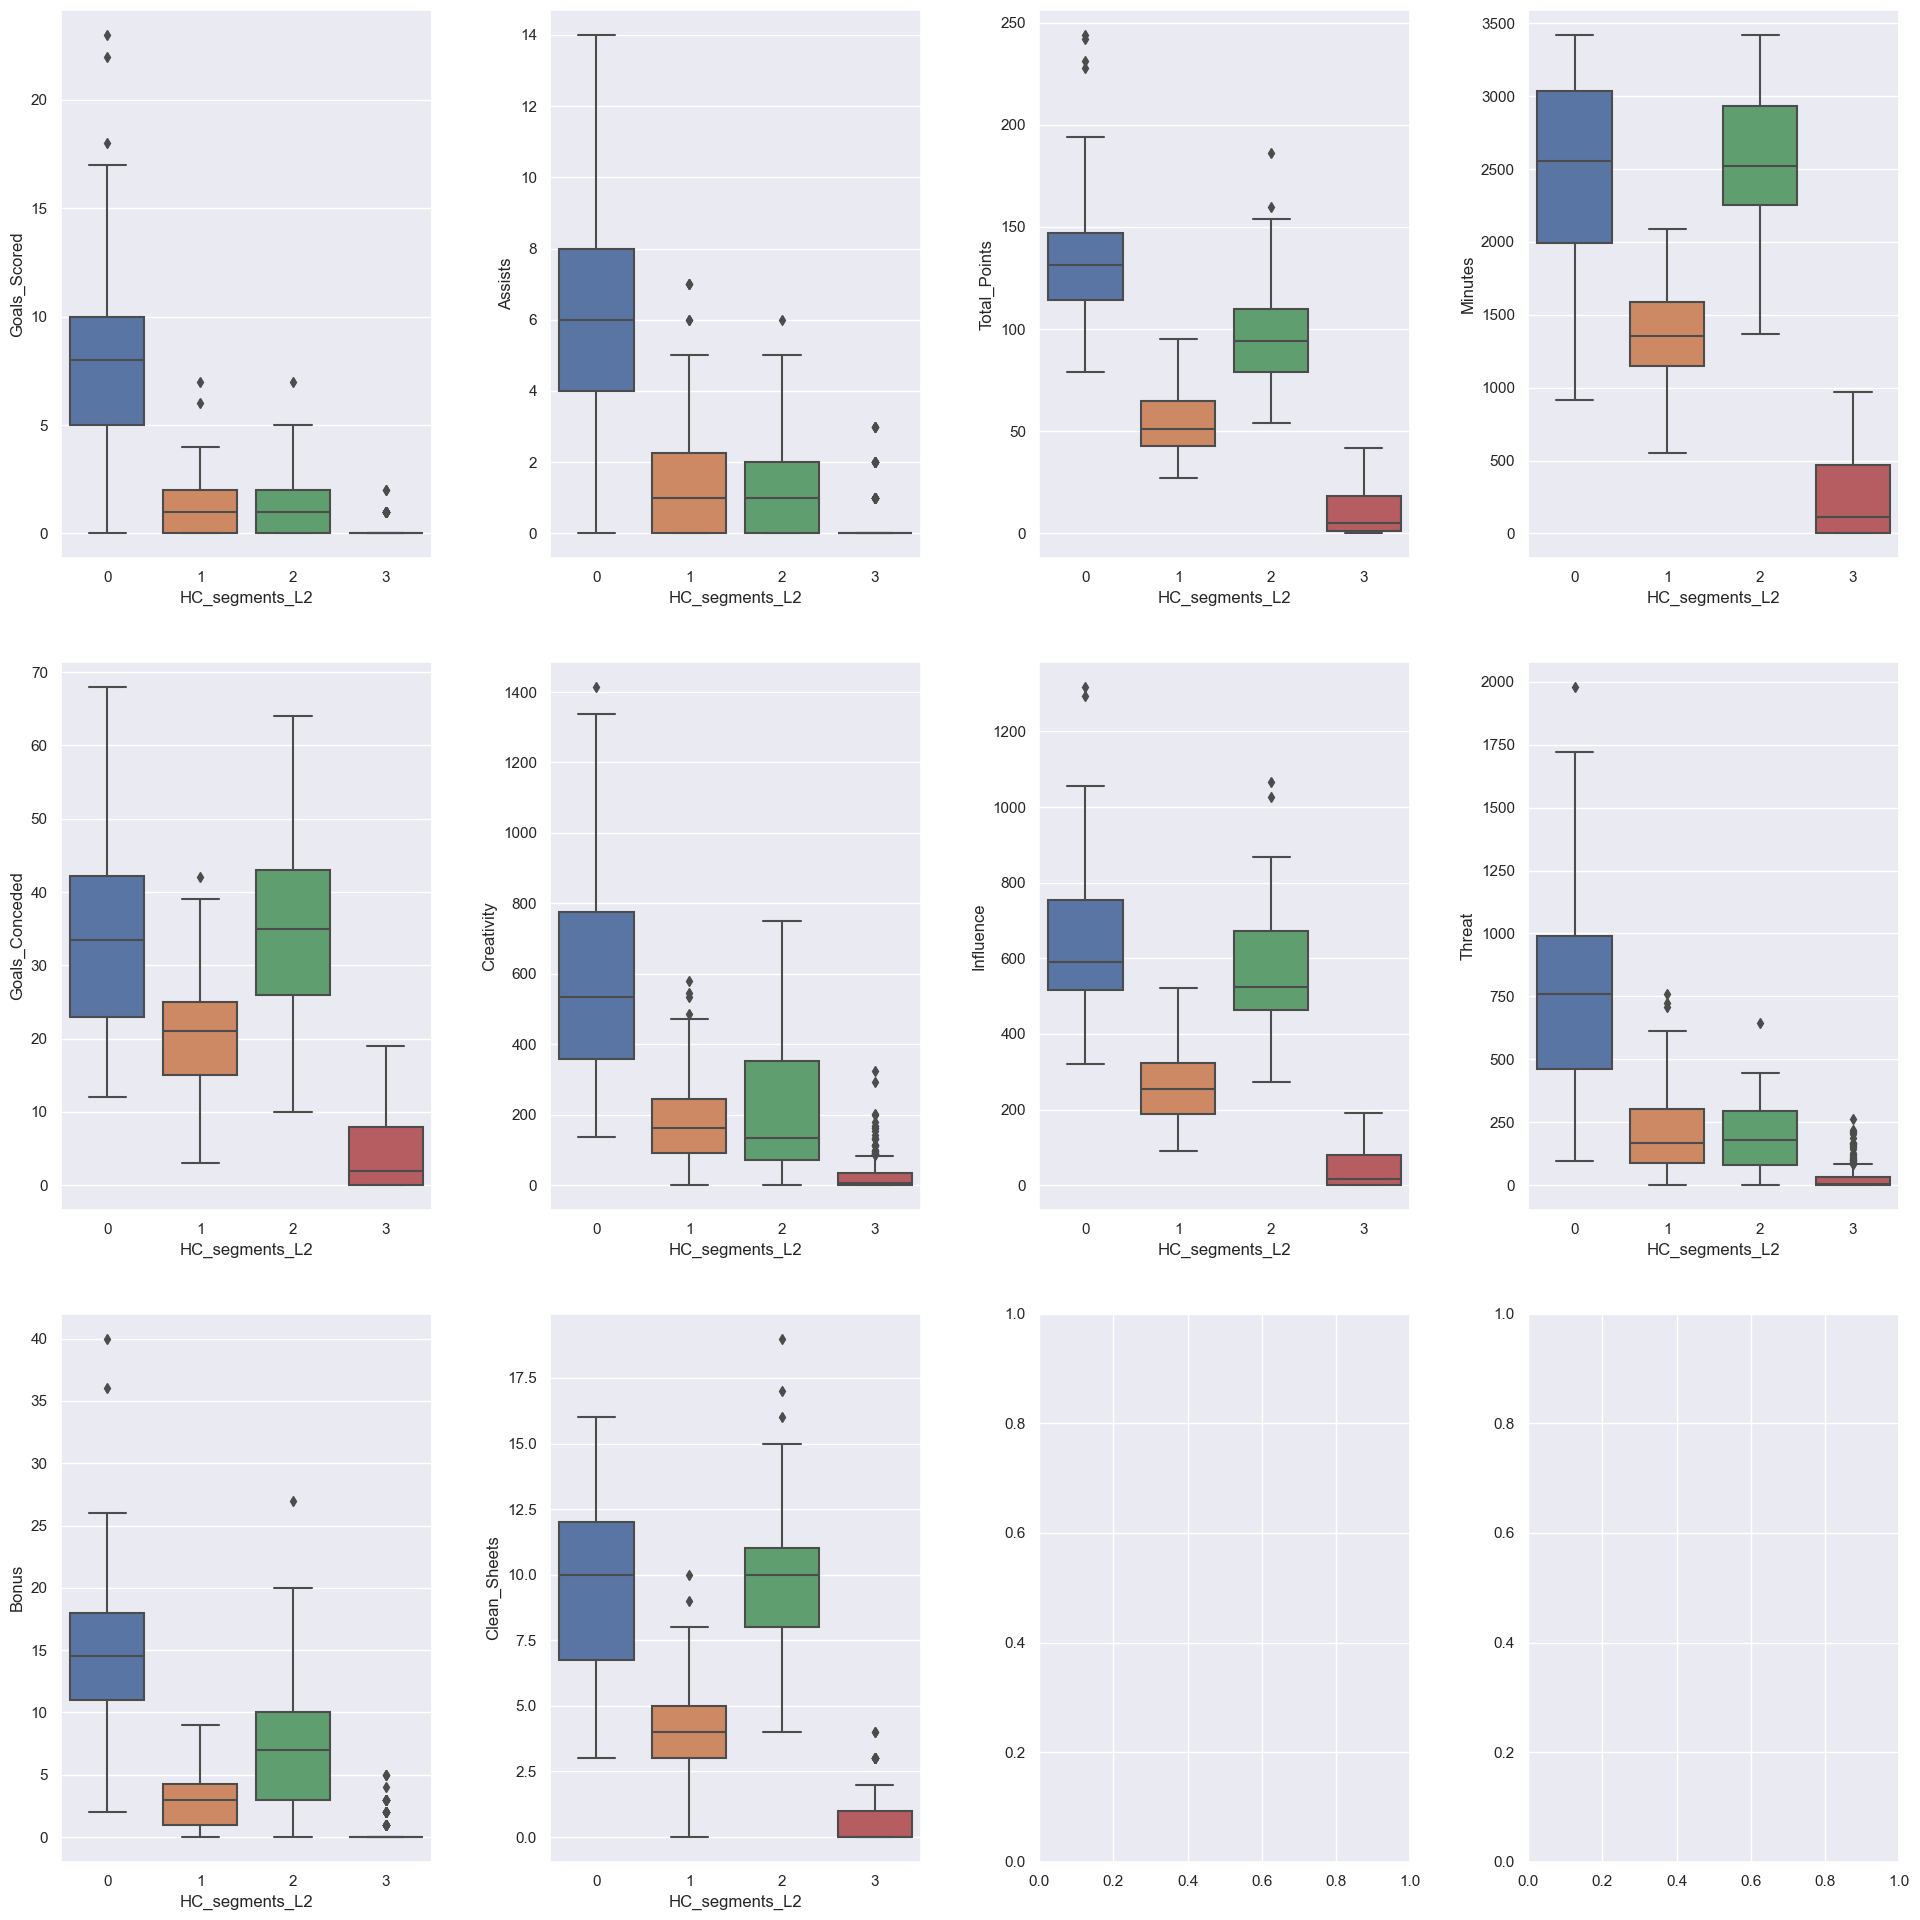

In [137]:
# Create boxplot for each of the variables
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df3,
                y = df3.columns[3 + counter],
                x = "HC_segments_L2",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

## **GMM clustering**

In [142]:
gmm_df = data_pca.copy()

In [143]:
gmm = GaussianMixture(n_components = 4, random_state = 1) # Initializing the Gaussian Mixture algorithm with n_components = 4

gmm.fit(gmm_df) # Fit the Gaussian Mixture algorithm on the gmm_df

GaussianMixture(n_components=4, random_state=1)

### **Cluster Profiling**

In [144]:
# Creating a copy of the original data
df4 = df.copy()

# Adding gmm cluster labels to the GMM and original dataframes
gmm_df["GMM_segments"] = gmm.predict(gmm_df)
df4["GMM_segments"] = gmm.predict(data_pca)

In [145]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df4' by cluster labels column and then find mean
gmm_cluster_profile = df4.groupby("GMM_segments").mean(numeric_only = True)

In [146]:
# Create the "count_in_each_segment" column in gmm cluster profile
gmm_cluster_profile["count_in_each_segment"] = (
    df4.groupby("GMM_segments")["Total_Points"].count().values
)

In [147]:
# Highlight the maximum average value among all the clusters for each of the variables
gmm_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
GMM_segments,,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034,116
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540,126
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714,105
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899,129


In [148]:
# Complete the code to print the players in each cluster. Hint: Use the GMM_segments feature
for cl in df4["GMM_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df4[df4["GMM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Matt Macey' 'Miguel Azeez' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Carney Chukwuemeka' 'Henri Lansbury'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Morgan Sanson'
 'Orjan Nyland' 'Wesley Moraes' 'Bernardo Fernandes da Silva Junior'
 'Davy Propper' 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Joel Mumbongo' 'Josh Benson' 'Lewis Richardson'
 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Valentino Livramento' 'Willy Caballero' 'Connor Wickham'
 'Jack Butland' 'James McCarthy' 'Mamadou Sakho' 'Martin Kelly'
 'Nathan Ferguson' 'Reece Hannam' 'Ryan Inniss' 'Sam Woods'
 'Stephen Henderson' 'Anthony Gordon' 'Cenk Tosun' 'Fabian Delph'
 'Joao Virginia' 'Jonjoe Kenny' 'Joshua King' 'Moise Kean'

**Let's plot the boxplot**

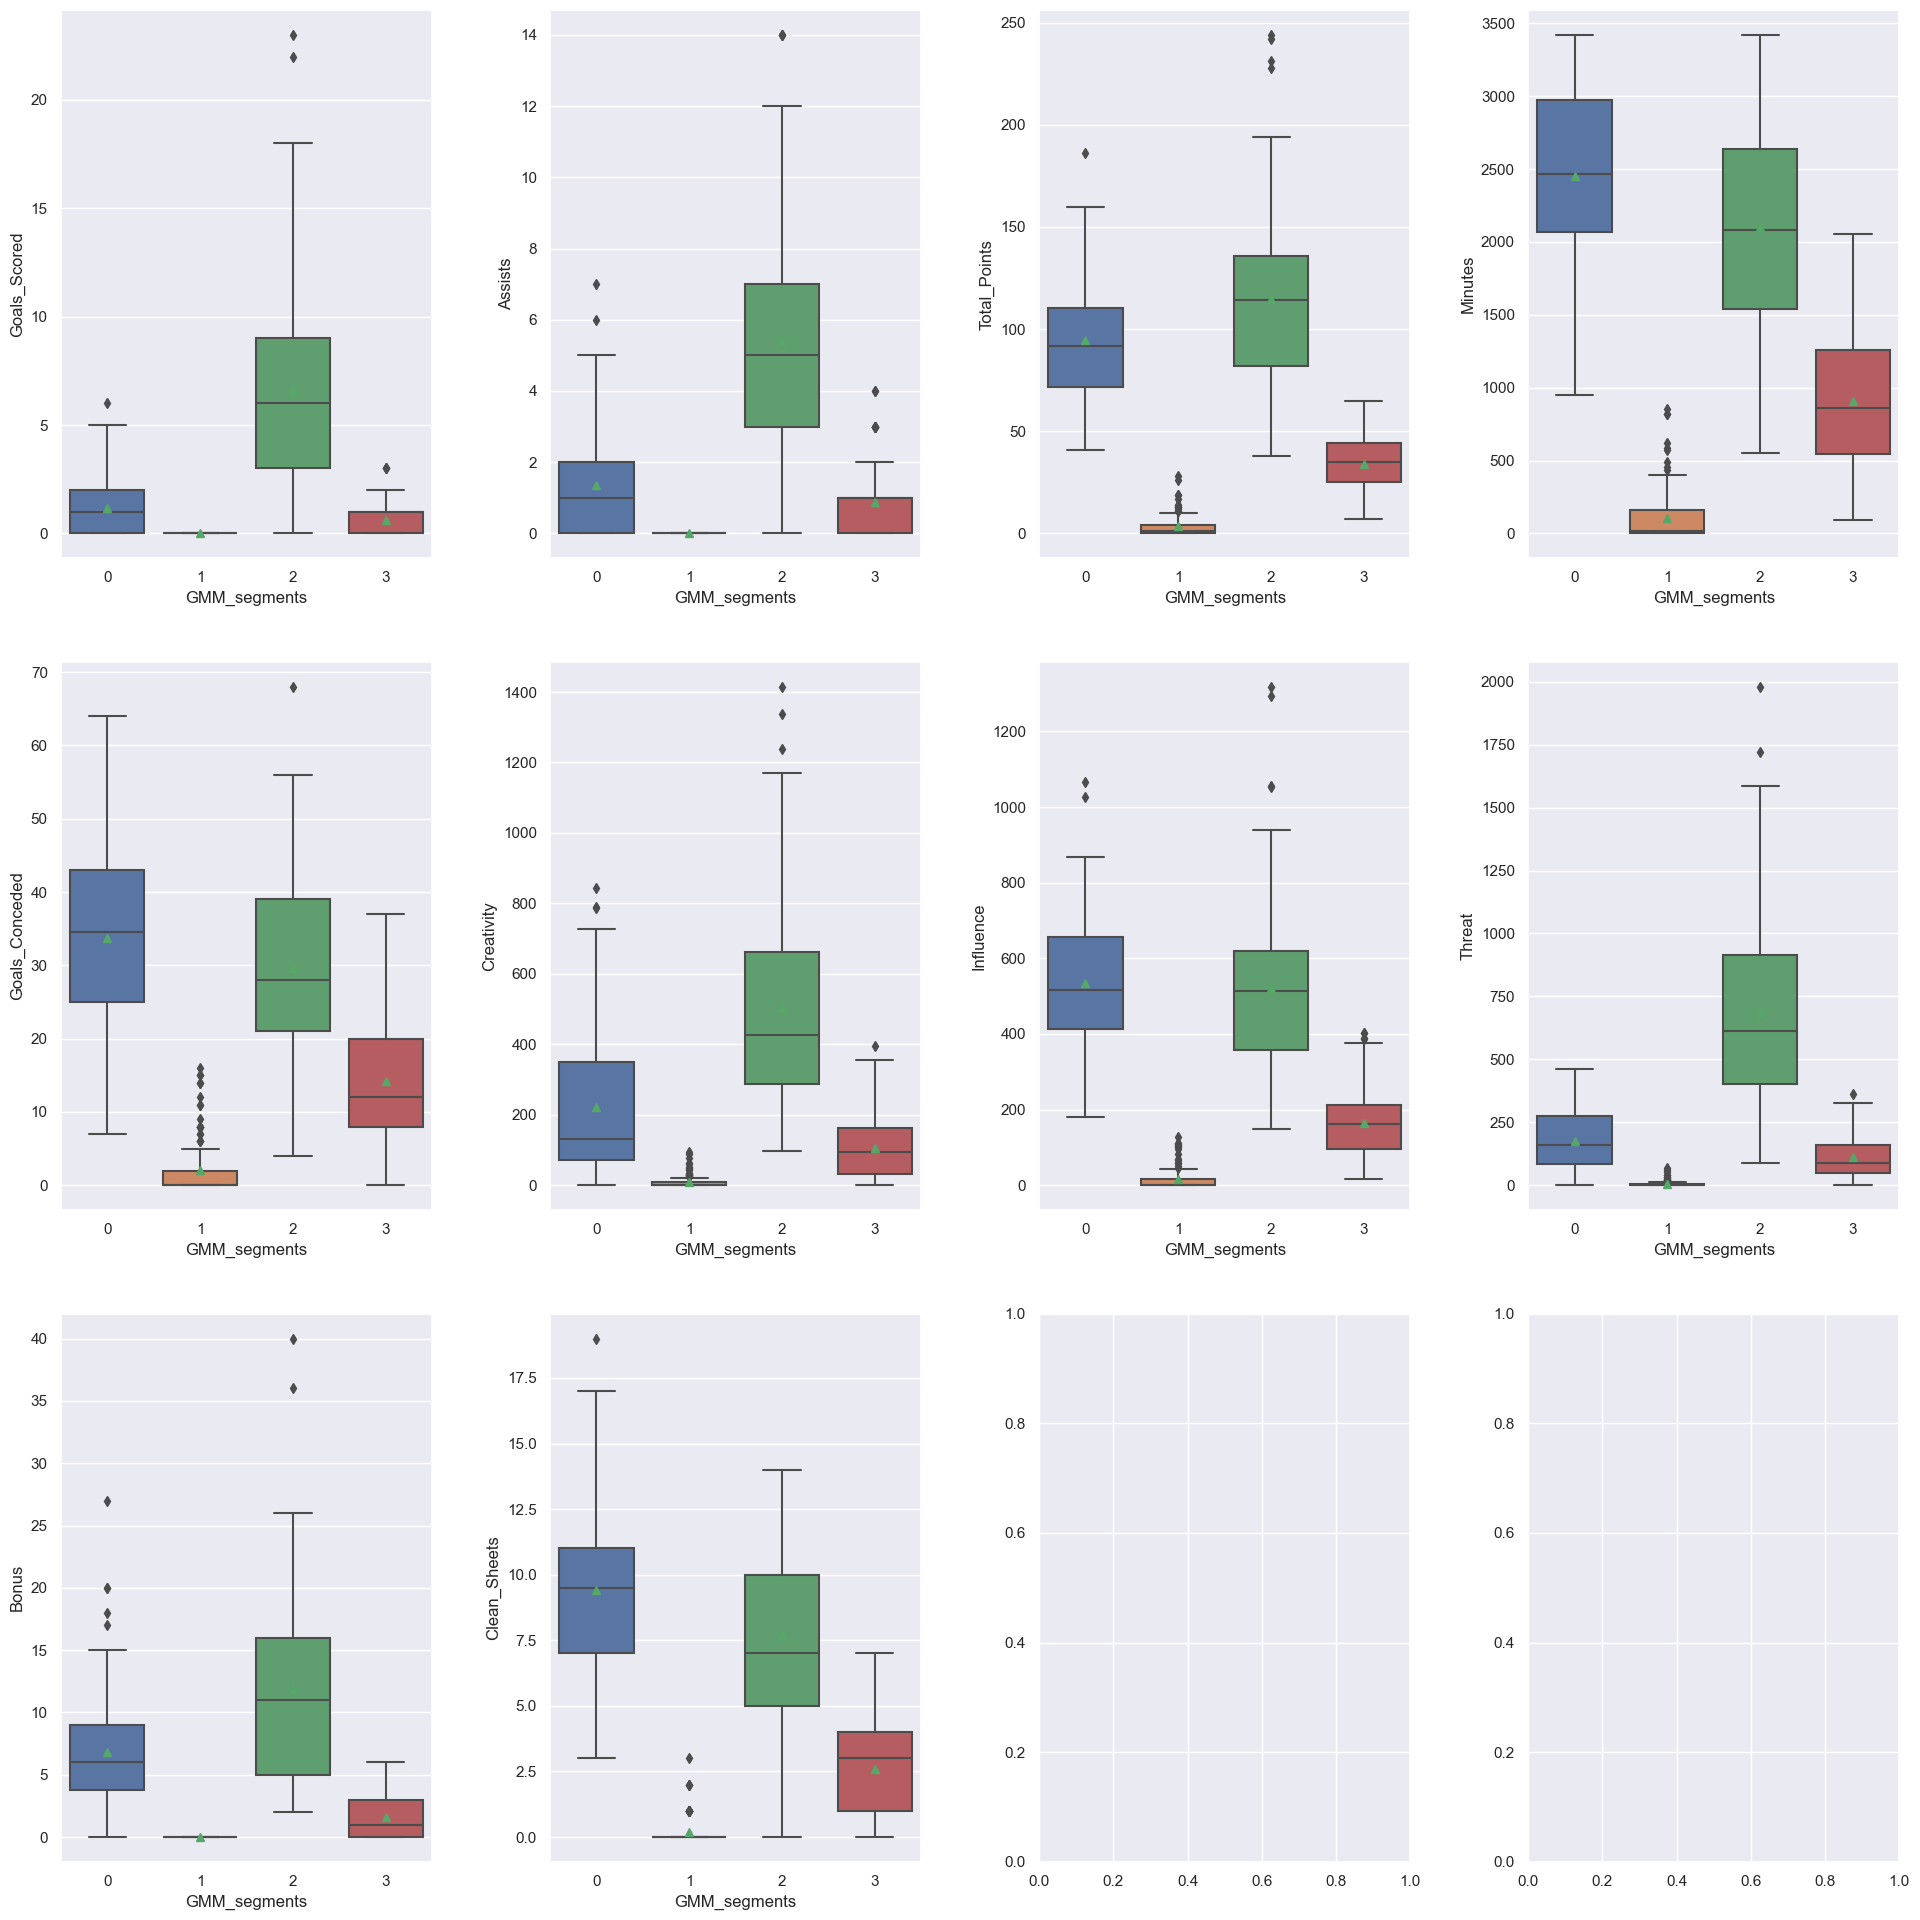

In [149]:
# Create boxplot for each of the variables
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df4,
                y = df4.columns[3 + counter],
                x = "GMM_segments",showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. 
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

In [150]:
dbscan_df = data_pca.copy()
dbscan_df1 = dbscan_df.copy()

In [151]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [152]:
# Finding the silhouette_score for each of the combination
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_df)          # Applying DBScan to each of the combinations in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_df, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                            # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                       # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.528300891282389
For eps value =2 For min sample =20 The average silhoutte_score is : 0.36478187516967553
For eps value =3 For min sample =6 The average silhoutte_score is : 0.624205189855851
For eps value =3 For min sample =20 The average silhoutte_score is : 0.6188492416303977


In [153]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


In [154]:
# Applying DBSCAN with the hyperparmeter values that we got
dbs = DBSCAN(eps = 3, min_samples = 20)
# Fit DBSCAN algorithm with the above hyperparameter values

In [155]:
# Creating a copy of the original data
df5 = df.copy()

# Add DBSCAN cluster labels to dbscan data
dbscan_df1["db_segments"] = dbs.fit_predict(dbscan_df1)

# Add DBSCAN cluster labels to original data
df5["db_segments"] =  dbs.fit_predict(dbscan_df)

### **Cluster Profiling**

In [156]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df5' by cluster labels column and then find mean
db_cluster_profile = df5.groupby("db_segments").mean(numeric_only = True)

In [157]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
db_cluster_profile["count_in_each_segment"] = (
    df5.groupby("db_segments")["Total_Points"].count().values
)

In [158]:
# Highlight the maximum average value among all the clusters for each of the variables
db_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
db_segments,,,,,,,,,,,
-1,18.666667,11.666667,221.000000,3045.000000,41.000000,779.533333,1067.566667,1447.000000,28.666667,11.166667,6
0,1.693617,1.625532,56.442553,1315.104255,18.878723,188.526383,284.750213,209.361702,4.412766,4.663830,470


**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

**Observations and Insights:**

### **Choosing the Best Algorithm**

- Since cluster profiles are the same for every algorithm except DBSCAN, it is difficult to choose the best algorithm. We can compute the silhouette score to choose the best algorithm among all the algorithms.

In [159]:
kmeans = KMeans(n_clusters = 4, random_state = 1, n_init = 'auto')        # Initializing K-Means with number of clusters as 4 and random_state = 1

preds = kmeans.fit_predict((data_pca))                   # Fitting and predicting K-Means on data_pca

score = silhouette_score(data_pca, preds)                # Calculating the silhouette score

print(score)         

0.4041109268663571


In [160]:
kmedoids = KMedoids(n_clusters = 4, random_state = 1)   # Initializing K-Medoids with number of clusters as 4 and random_state=1

preds = kmedoids.fit_predict((data_pca))                # Fitting and predicting K-Medoids on data_pca

score = silhouette_score(data_pca, preds)               # Calculating the silhouette score

print(score)   

0.3938224996935729


In [161]:
# Initializing Agglomerative Clustering with distance as Euclidean, linkage as ward with clusters = 4
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "ward",) 

# Fitting on PCA data
preds = HCmodel.fit_predict(data_pca)  

score = silhouette_score(data_pca, preds)             # Calculating the silhouette score

print(score) 

0.38497099860254663


In [162]:
# Initializing Gaussian Mixture algorithm with number of clusters as 4 and random_state = 1
gmm = GaussianMixture(n_components=4, random_state=1)   

# Fitting and predicting Gaussian Mixture algorithm on data_pca
preds = gmm.fit_predict((data_pca))

# Calculating the silhouette score
score = silhouette_score(data_pca, preds)

# Printing the score
print(score)

0.2849464429730214
